<div style="text-align: right;">
    <strong>Group Number 5</strong><br>
    AnupKumar Bochare 002306798<br>
    Kaushik Jayaprakash 002300709<br>
    Rajesh Kumar Rama Reddy 002303770
</div>

<div style="padding: 15px; border-radius: 8px; margin: 10px 0; background: linear-gradient(135deg, #1a1a1a, #4a4a4a);">
    <h1 style="text-align: center; font-family: Arial, sans-serif; color: white; margin: 0; font-size: 24px;">
        🎯 Final Project
    </h1>
    <h3 style="text-align: center; font-family: Arial, sans-serif; color: #e0e0e0; margin: 5px 0; font-weight: normal;">
            📊 Data Science Engineering Methods and Tools
    </h3>
</div>



<img src="images/hello.gif" alt="Hello" width="300" height="200">

<div style="display: flex; justify-content: space-between; align-items: center; background: linear-gradient(135deg, #1565c0, #0d47a1); padding: 25px; border-radius: 15px; margin: 20px 0; box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
    <div style="display: flex; align-items: center;">
        <h1 style="color: white; margin: 0; font-size: 32px; font-family: 'Arial', sans-serif; text-shadow: 2px 2px 4px rgba(0,0,0,0.2);">
            Hypothesis - Higher CO2 emissions correlate with increased death rates due to environmental health impacts.
        </h1>
    </div>
    
</div>


<div style="background: linear-gradient(135deg, #1e5631, #2e8b57); padding: 20px; border-radius: 12px; margin: 15px 0; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <h1 style="color: white; text-align: center; font-family: 'Arial', sans-serif; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        🌍 Merging Multiple Carbon Emission Datasets for Comprehensive Analysis
    </h1>
</div>



!pip list - Use this command to get the list of all libraries and modules used in this project. 


!pip freeze > requirements.txt 
Use this command to generate and download the (requirements.txt)file of all libraries and modules used in this project. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
import pymc as pm
import arviz as az
import kagglehub
import shutil
import os
import warnings
warnings.filterwarnings("ignore")

def combine_emissions_data(annual_file, change_file, land_use_file, source_file):
    # Load the datasets
    annual_emissions = pd.read_csv(annual_file)
    change_pct = pd.read_csv(change_file)
    including_land_use = pd.read_csv(land_use_file)
    source_emissions = pd.read_csv(source_file)
    
    # Clean up duplicate columns in source_emissions
    source_cols = source_emissions.columns[:9]  # Keep only first set of columns
    source_emissions = source_emissions[source_cols]
    
    # Merge all datasets on common columns
    combined = annual_emissions.merge(
        change_pct, 
        on=['Entity', 'Code', 'Year'], 
        suffixes=('', '_growth')
    )
    
    combined = combined.merge(
        including_land_use, 
        on=['Entity', 'Code', 'Year'], 
        suffixes=('', '_land_use')
    )
    
    combined = combined.merge(
        source_emissions, 
        on=['Entity', 'Code', 'Year'], 
        suffixes=('', '_source')
    )
    
    # Rename columns for clarity
    combined = combined.rename(columns={
        'Annual CO₂ emissions': 'total_emissions',
        'Annual CO₂ emissions growth (%)': 'emissions_growth',
        'Annual CO₂ emissions including land-use change': 'emissions_with_land_use'
    })
    
    # Remove duplicate columns
    combined = combined.loc[:, ~combined.columns.duplicated()]
    
    return combined

# Example usage:
combined_data = combine_emissions_data(
    'annual-co2-emissions-per-country.csv',
    'change-co2-annual-pct.csv',
    'annual-co2-including-land-use.csv',
    'co2-by-source.csv'
)

# Save combined dataset
combined_data.to_csv('combined_emissions_data.csv', index=False)

/Users/rajesh/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<div style="background: linear-gradient(to right, #2c3e50, #3498db); padding: 12px; border-radius: 8px; margin: 10px 0; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
    <h3 style="color: white; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        🗑️ Data Cleanup: Removing Unnecessary Columns.
    </h3>
</div>


In [2]:
## Droping Annual CO₂ emissions from other industry
# Load the dataset
file_path = 'combined_emissions_data.csv'
co2_df = pd.read_csv(file_path)

# Drop the specified column
co2_df = co2_df.drop(columns=['Annual CO₂ emissions from other industry'])

# Save the updated dataset
updated_file_path = 'updated_co2_emissions_data.csv'
co2_df.to_csv(updated_file_path, index=False)

print(co2_df.head())

  Entity Code  Year  total_emissions  emissions_growth  \
0  China  CHN  1980       1494495900         -2.042741   
1  China  CHN  1981       1476487800         -1.204962   
2  China  CHN  1982       1606585000          8.811259   
3  China  CHN  1983       1694216800          5.454540   
4  China  CHN  1984       1844828000          8.889723   

   emissions_with_land_use  Annual CO₂ emissions from flaring  \
0               2554014700                          3011808.0   
1               2466619000                          2689383.0   
2               2551509000                          2524496.0   
3               2588784400                          2671056.0   
4               2699097600                          3213328.0   

   Annual CO₂ emissions from cement  Annual CO₂ emissions from gas  \
0                        32712364.0                     27318784.0   
1                        33902720.0                     24387646.0   
2                        38869884.0               


<div style="background: linear-gradient(to right, #2c3e50, #3498db); padding: 12px; border-radius: 8px; margin: 10px 0; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
    <h3 style="color: white; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        📊 Handling Null Values
    </h3>
</div>


In [3]:
## to fill values for 0 entry

# Load the dataset
file_path = 'updated_co2_emissions_data.csv'
co2_df = pd.read_csv(file_path)

# List of columns to clean
columns_to_clean = [
    'Annual CO₂ emissions from flaring',
    'Annual CO₂ emissions from cement',
    'Annual CO₂ emissions from gas',
    'Annual CO₂ emissions from oil',
    'Annual CO₂ emissions from coal'
]

# Replace 0.0 with NaN for targeted columns
co2_df[columns_to_clean] = co2_df[columns_to_clean].replace(0.0, pd.NA)

# Fill NaN values (including former 0.0 values) with the mean for the respective country and column
for column in columns_to_clean:
    co2_df[column] = co2_df.groupby('Entity')[column].transform(
        lambda x: x.fillna(x.mean())
    )

# Save the updated dataset, replacing the original file
co2_df.to_csv(file_path, index=False)

# Optional: Display the first few rows of the updated dataset
print(co2_df.head())

  Entity Code  Year  total_emissions  emissions_growth  \
0  China  CHN  1980       1494495900         -2.042741   
1  China  CHN  1981       1476487800         -1.204962   
2  China  CHN  1982       1606585000          8.811259   
3  China  CHN  1983       1694216800          5.454540   
4  China  CHN  1984       1844828000          8.889723   

   emissions_with_land_use  Annual CO₂ emissions from flaring  \
0               2554014700                          3011808.0   
1               2466619000                          2689383.0   
2               2551509000                          2524496.0   
3               2588784400                          2671056.0   
4               2699097600                          3213328.0   

   Annual CO₂ emissions from cement  Annual CO₂ emissions from gas  \
0                        32712364.0                     27318784.0   
1                        33902720.0                     24387646.0   
2                        38869884.0               


<div style="background: linear-gradient(to right, #2c3e50, #3498db); padding: 12px; border-radius: 8px; margin: 10px 0; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
    <h3 style="color: white; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        🌎 Merge CO2 Data: China, Greece, India, USA, UK
    </h3>
</div>


In [4]:
# File paths for individual country datasets
file_paths = [
    'China.csv',
    'Greece.csv',
    'India.csv',
    'USA.csv',
    'United_Kingdom.csv'
    
]

# Combine all datasets country by country
combined_df = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# Save the combined dataset
combined_file_path = 'combined_countries_data.csv'
combined_df.to_csv(combined_file_path, index=False)

# Print confirmation
print(f"Combined dataset saved to: {combined_file_path}")

Combined dataset saved to: combined_countries_data.csv


In [5]:
# Define the custom order for countries
custom_order = ['China', 'Greece', 'India', 'United States of America', 'United Kingdom']

# Read the dataset
df = pd.read_csv('combined_countries_data.csv')

# Create a categorical type with custom order
df['location_name'] = pd.Categorical(df['location_name'], 
                                   categories=custom_order, 
                                   ordered=True)

# Sort by location_name first (which will use the custom order) and then by year
sorted_df = df.sort_values(['location_name', 'year'])

# Save the sorted dataset
sorted_df.to_csv('sorted_countries_data.csv', index=False)

# Display the first few rows to verify sorting
print(sorted_df.head())

    measure_id measure_name  location_id location_name  sex_id sex_name  \
18           1       Deaths            6         China       1     Male   
19           1       Deaths            6         China       2   Female   
20           1       Deaths            6         China       1     Male   
21           1       Deaths            6         China       2   Female   
22           1       Deaths            6         China       1     Male   

    age_id     age_name  cause_id                    cause_name  metric_id  \
18       8  15-19 years       508  Chronic respiratory diseases          1   
19       8  15-19 years       508  Chronic respiratory diseases          1   
20       9  20-24 years       508  Chronic respiratory diseases          1   
21       9  20-24 years       508  Chronic respiratory diseases          1   
22      10  25-29 years       508  Chronic respiratory diseases          1   

   metric_name  year          val        upper       lower  
18      Number  198

In [6]:
# Load the dataset
data = pd.read_csv('sorted_countries_data.csv')

# Replace 'United States of America' with 'United States'
data['location_name'] = data['location_name'].replace('United States of America', 'United States')

# Save the modified dataset
data.to_csv('modified_sorted_countries_data.csv', index=False)

# Verify the changes
print("Unique country names after modification:")
print(data['location_name'].unique())

Unique country names after modification:
['China' 'Greece' 'India' 'United States' 'United Kingdom']


In [7]:
# Read both datasets
sorted_countries_df = pd.read_csv('modified_sorted_countries_data.csv')
updated_co2_df = pd.read_csv('updated_co2_emissions_data.csv')

# Merge datasets on country name (Entity/location_name) and year
combined_df = pd.merge(sorted_countries_df, updated_co2_df,
                      left_on=['location_name', 'year'],
                      right_on=['Entity', 'Year'],
                      how='inner')

# Save the combined dataset
combined_df.to_csv('combined_countries_and_co2_data.csv', index=False)

<div style="background: linear-gradient(to right, #2c3e50, #27ae60); padding: 12px; border-radius: 8px; margin: 10px 0; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
    <h3 style="color: white; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        🔄 Data Processing: CO₂ Emissions & Death Rate 
    </h3>
</div>


In [8]:
# Set plotting style
# plt.style.use('seaborn')
sns.set_palette("husl")

# Load the datasets
emissions_df = pd.read_csv('updated_co2_emissions_data.csv')
health_df = pd.read_csv('modified_sorted_countries_data.csv')

# Clean and prepare emissions data
def prepare_emissions_data(df):
    # Convert columns to numeric
    numeric_columns = ['total_emissions', 'emissions_growth', 'emissions_with_land_use',
                      'Annual CO₂ emissions from flaring', 'Annual CO₂ emissions from cement',
                      'Annual CO₂ emissions from gas', 'Annual CO₂ emissions from oil',
                      'Annual CO₂ emissions from coal']
    
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    # Add per capita emissions (assuming population data exists)
    if 'population' in df.columns:
        df['emissions_per_capita'] = df['total_emissions'] / df['population']
    
    return df

# Clean and prepare health data
def prepare_health_data(df):
    # Group death rates by country, year and age group
    health_grouped = df.groupby(['location_name', 'year', 'age_name'])['val'].mean().reset_index()
    
    # Pivot the age groups to columns
    health_wide = health_grouped.pivot(index=['location_name', 'year'], 
                                     columns='age_name', 
                                     values='val').reset_index()
    
    return health_wide

# Combine datasets
def combine_datasets(emissions_df, health_df):
    # Prepare both datasets
    emissions_clean = prepare_emissions_data(emissions_df)
    health_clean = prepare_health_data(health_df)
    
    # Merge on country and year
    combined_df = pd.merge(emissions_clean, health_clean,
                          left_on=['Entity', 'Year'],
                          right_on=['location_name', 'year'],
                          how='inner')
    
    return combined_df

Data Integration & Statistical Summary


In [9]:
def analyze_emissions_health_correlation(df):
    # Calculate correlation between emissions and death rates
    age_groups = [col for col in df.columns if 'years' in str(col)]
    emission_types = ['total_emissions', 'Annual CO₂ emissions from coal',
                     'Annual CO₂ emissions from oil', 'Annual CO₂ emissions from gas']
    
    correlations = pd.DataFrame()
    
    for emission in emission_types:
        for age in age_groups:
            corr = df[emission].corr(df[age])
            correlations.loc[emission, age] = corr
    
    return correlations

def plot_emissions_trend(df):
    plt.figure(figsize=(12, 6))
    for country in df['Entity'].unique():
        country_data = df[df['Entity'] == country]
        plt.plot(country_data['Year'], country_data['total_emissions'], 
                label=country, marker='o', markersize=4)
    
    plt.title('CO2 Emissions Trend by Country')
    plt.xlabel('Year')
    plt.ylabel('Total Emissions')
    plt.legend()
    plt.grid(True)
    plt.show()

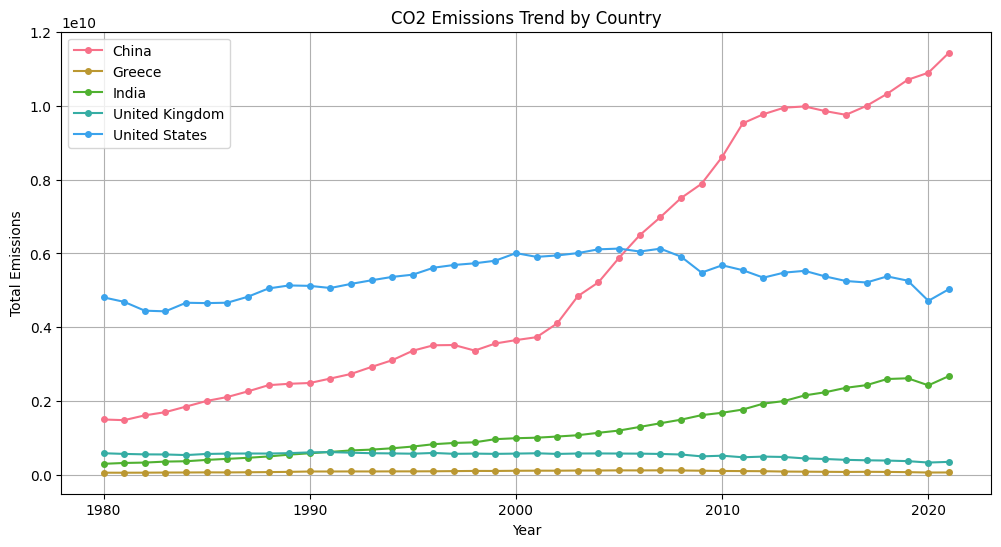

In [10]:
# Execute the analysis
def main():
    # Load and combine data
    combined_data = combine_datasets(emissions_df, health_df)
    
    # Calculate correlations
    correlations = analyze_emissions_health_correlation(combined_data)
    
    # Plot emissions trends
    plot_emissions_trend(combined_data)
    
    # Create summary statistics
    summary_stats = combined_data.groupby('Entity').agg({
        'total_emissions': ['mean', 'std', 'min', 'max'],
        'emissions_growth': 'mean'
    }).round(2)
    
    return combined_data, correlations, summary_stats

if __name__ == "__main__":
    combined_data, correlations, summary_stats = main()

Let's begin by transforming our raw data into meaningful features through a systematic engineering process. Our dataset contains mortality and emissions data that we'll enhance through several key transformations
using Feature Engineering.
These engineered features will help us uncover deeper insights and patterns in our mortality and emissions data.

In [11]:
# Load the dataset
data = pd.read_csv('modified_sorted_countries_data.csv')

# 1. Create age group categories
def categorize_age(age):
    if 'years' not in str(age):
        return 'Other'
    age_num = int(age.split('-')[0])
    if age_num < 25:
        return 'Young'
    elif age_num < 50:
        return 'Adult'
    else:
        return 'Senior'

data['age_category'] = data['age_name'].apply(categorize_age)

# 2. Calculate mortality rates and trends
data['mortality_rate'] = data.groupby(['location_name', 'year'])['val'].transform('mean')
data['year_trend'] = data.groupby(['location_name', 'age_name'])['val'].pct_change()

# 3. Create gender-based metrics
data['gender_ratio'] = data.groupby(['location_name', 'year', 'age_name'])['val'].transform(
    lambda x: x[x.index % 2 == 0] / x[x.index % 2 == 1]
)

# 4. Calculate rolling averages
data['rolling_avg'] = data.groupby(['location_name', 'age_name'])['val'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

# 5. Create relative risk metrics
data['relative_risk'] = data.groupby('year')['val'].transform(
    lambda x: x / x.mean()
)

# 6. Generate seasonal indicators
data['decade'] = (data['year'] // 10) * 10

# Save the enhanced dataset
data.to_csv('enhanced_respiratory_data.csv', index=False)

# Display summary of new features

for col in ['age_category', 'mortality_rate', 'year_trend', 
            'gender_ratio', 'rolling_avg', 'relative_risk', 'decade']:
    print(f"\n{col} statistics:")
    print(data[col].describe())


age_category statistics:
count      3780
unique        3
top       Adult
freq       2100
Name: age_category, dtype: object

mortality_rate statistics:
count     3780.000000
mean      8098.938588
std       9244.495027
min         21.969238
25%        441.489766
50%       2151.435103
75%      17345.182931
max      27426.592652
Name: mortality_rate, dtype: float64

year_trend statistics:
count    3735.000000
mean        0.050691
std         0.354886
min        -0.583123
25%        -0.234145
50%        -0.003074
75%         0.281482
max         1.544579
Name: year_trend, dtype: float64

gender_ratio statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: gender_ratio, dtype: float64

rolling_avg statistics:
count      3780.000000
mean       8109.301884
std       29192.316507
min           0.644275
25%          25.627396
50%         304.435393
75%        2347.797445
max      214538.532386
Name: rolling_avg, dtype: float64

r


<div style="background: linear-gradient(to right, #2c3e50, #3498db); padding: 12px; border-radius: 8px; margin: 10px 0; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
    <h3 style="color: white; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        🌎  Let's Visualise CO₂ Emissions & Mortality Rates
    </h3>
</div>

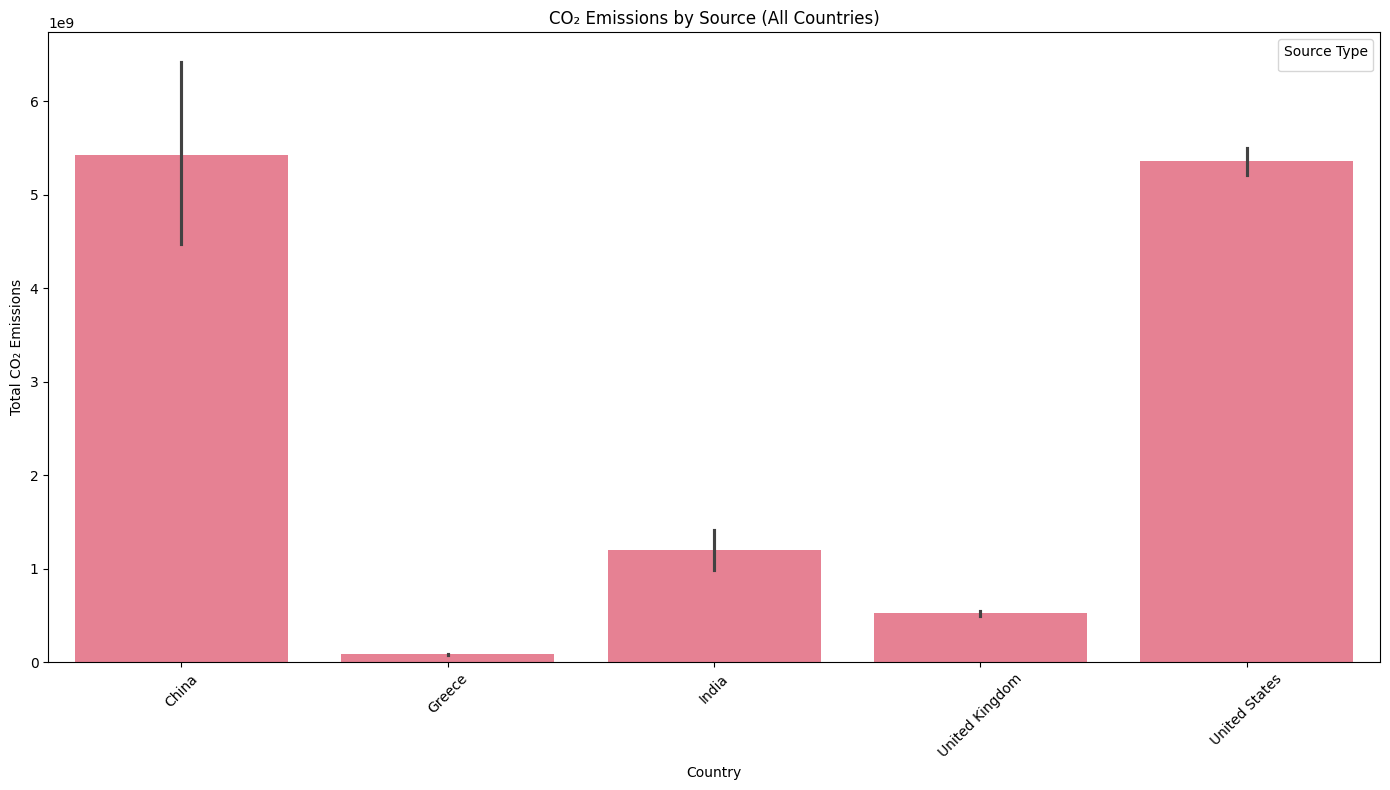

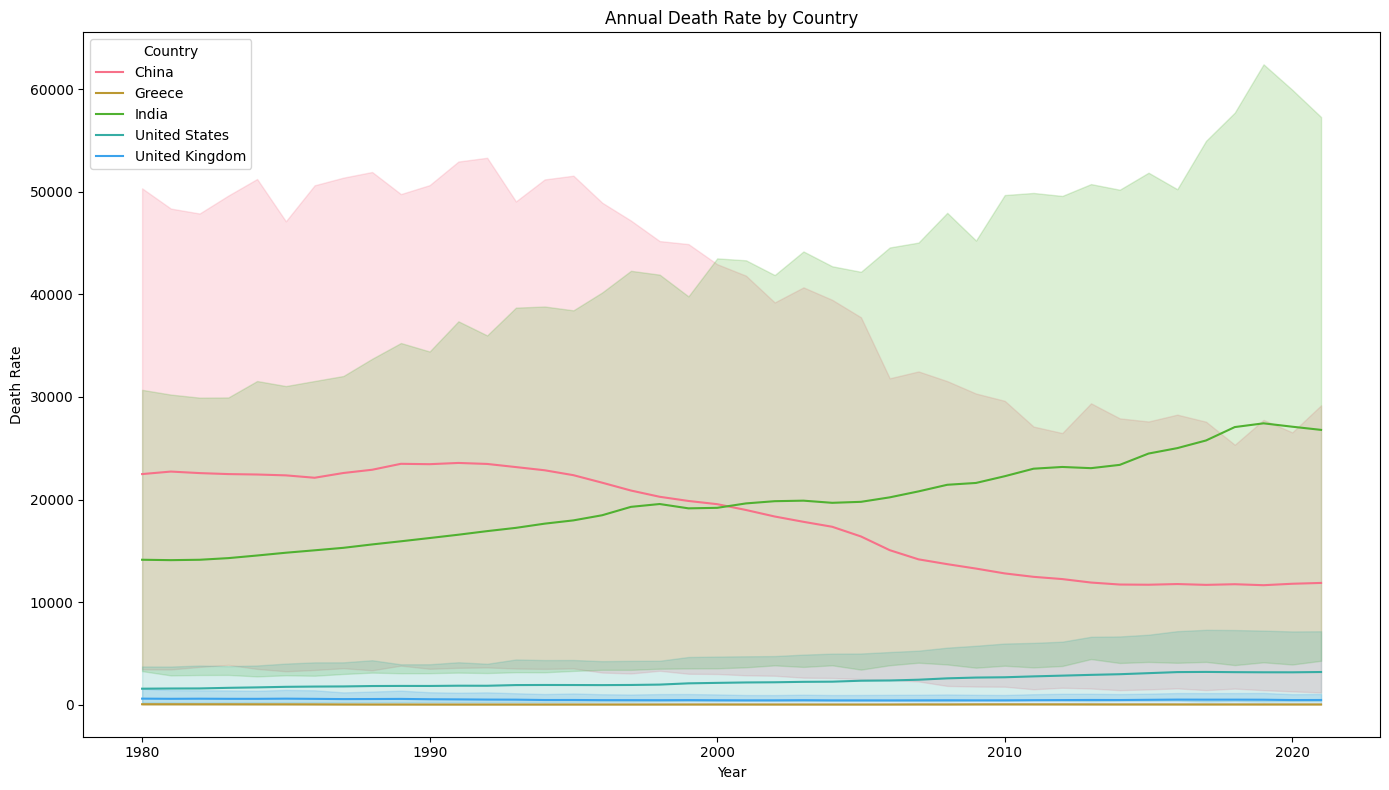

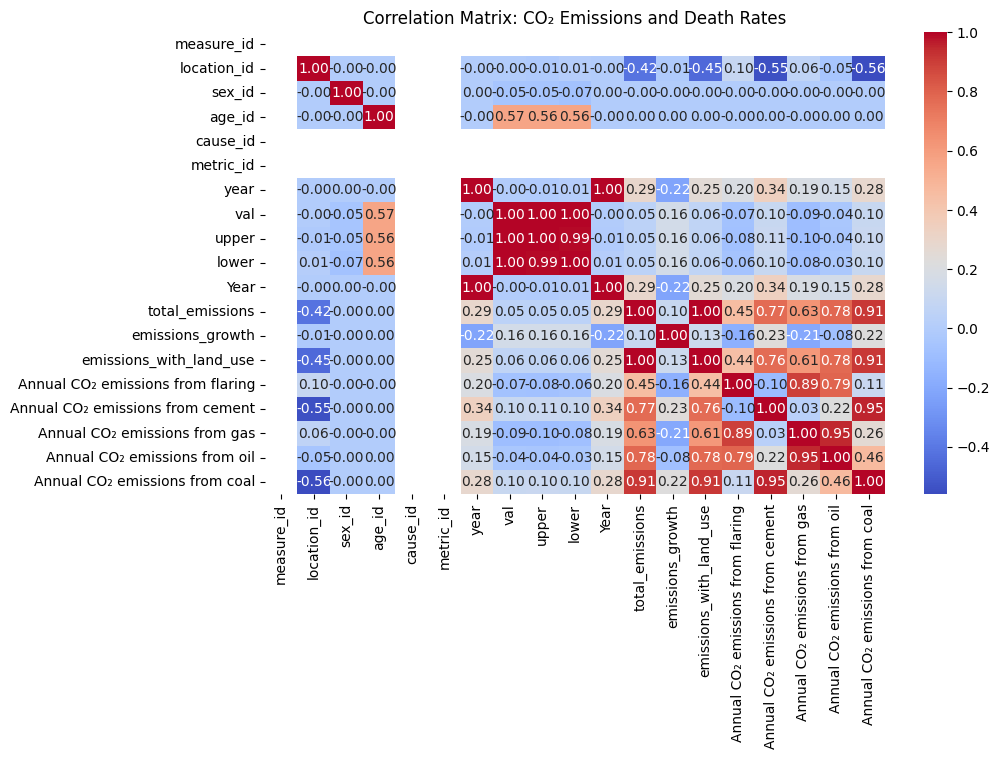

In [12]:
# Load datasets
co2_file = 'updated_co2_emissions_data.csv'
death_rate_file = 'modified_sorted_countries_data.csv'

co2_df = pd.read_csv(co2_file)
death_rate_df = pd.read_csv(death_rate_file)

# CO₂ Emissions by Sources
plt.figure(figsize=(14, 8))
sns.barplot(data=co2_df, x='Entity', y='total_emissions')  # Adjust 'source_type' to your column
plt.title('CO₂ Emissions by Source (All Countries)')
plt.xlabel('Country')
plt.ylabel('Total CO₂ Emissions')
plt.xticks(rotation=45)
plt.legend(title='Source Type')
plt.tight_layout()
plt.show()

# Annual Death Rate by Country
plt.figure(figsize=(14, 8))
sns.lineplot(data=death_rate_df, x='year', y='val', hue='location_name')  # Adjust 'death_rate' column if different
plt.title('Annual Death Rate by Country')
plt.xlabel('Year')
plt.ylabel('Death Rate')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

# Load the dataset
combined_file = 'combined_countries_and_co2_data.csv'
combined_df = pd.read_csv(combined_file)

# Select only numeric columns for correlation analysis
numeric_columns = combined_df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix: CO₂ Emissions and Death Rates')
plt.show()




# Advanced Graph: Geospatial Map
# You can use geopandas or plotly for interactive maps
# Example using plotly
import plotly.express as px

fig = px.choropleth(
    combined_df,
    locations='location_name',
    locationmode='country names',
    color='total_emissions',
    hover_name='location_name',
    title='CO₂ Emissions by Country'
)
fig.show()

<div style="padding: 20px; border: 2px solid #2c3e50; border-radius: 10px; margin: 15px 0;">
    <h1 style="text-align: center; font-family: Arial, sans-serif; margin: 0; font-size: 24px;">
        📊 Statistical Correlation Analysis
    </h1>
    <h2 style="text-align: center; font-family: Arial, sans-serif; margin: 10px 0; font-size: 18px; font-weight: normal;">
        (Pearson Correlation Analysis and Spearman correlation Analysis) 
    </h2>
        <h3 style="text-align: center; font-family: Arial, sans-serif; margin: 10px 0; font-size: 18px; font-weight: normal;">
        CO₂ Emissions vs Mortality Rates: Country-wise Comparison
    </h3>
</div>


Overall Pearson Correlation: 0.046595876685167154, P-value: 0.004164791442249846
Overall Spearman Correlation: 0.5345229059258916, P-value: 2.2317708465412652e-278

Country-wise Correlation Results:
          Country  Pearson Correlation  Pearson P-value  Spearman Correlation  \
0           China            -0.103420         0.004420             -0.267778   
1          Greece            -0.051228         0.159390              0.019573   
2           India             0.085822         0.018267              0.070918   
3  United Kingdom             0.006566         0.856955              0.051053   
4   United States             0.027088         0.457061              0.064511   

   Spearman P-value  
0      7.011738e-14  
1      5.910327e-01  
2      5.127632e-02  
3      1.608171e-01  
4      7.628452e-02  


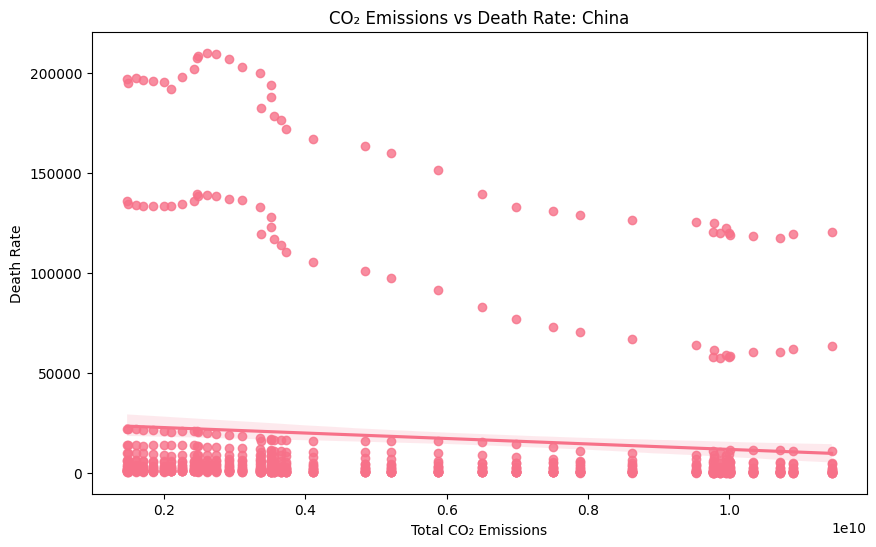

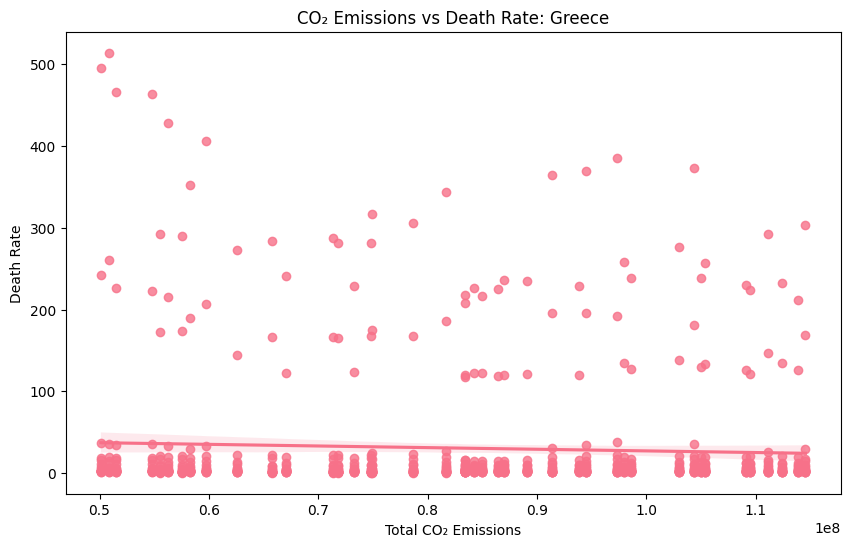

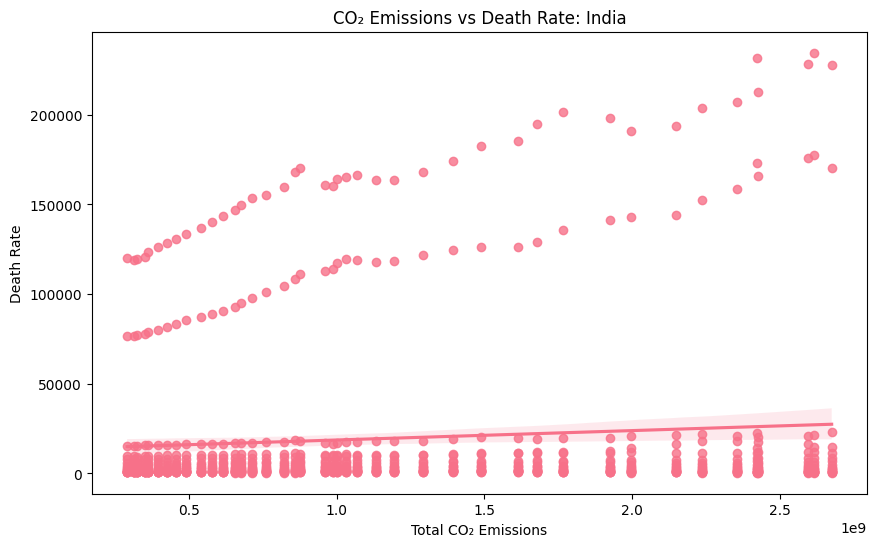

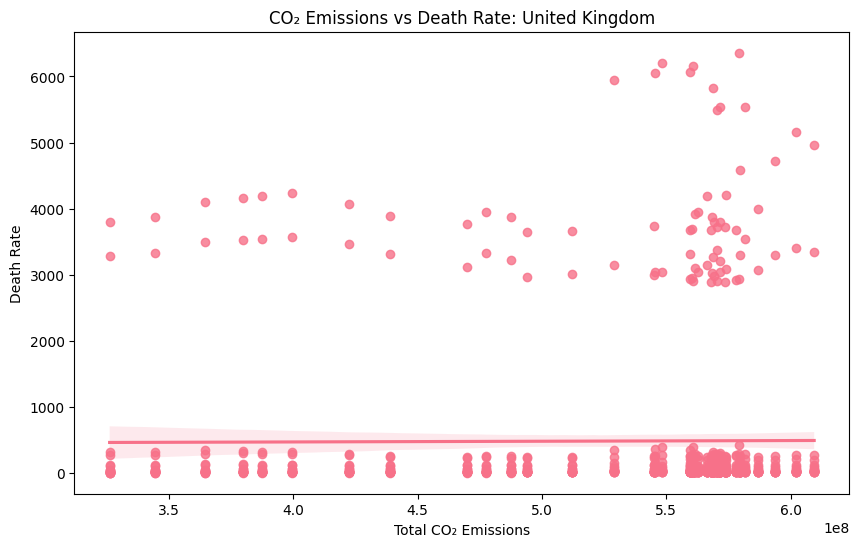

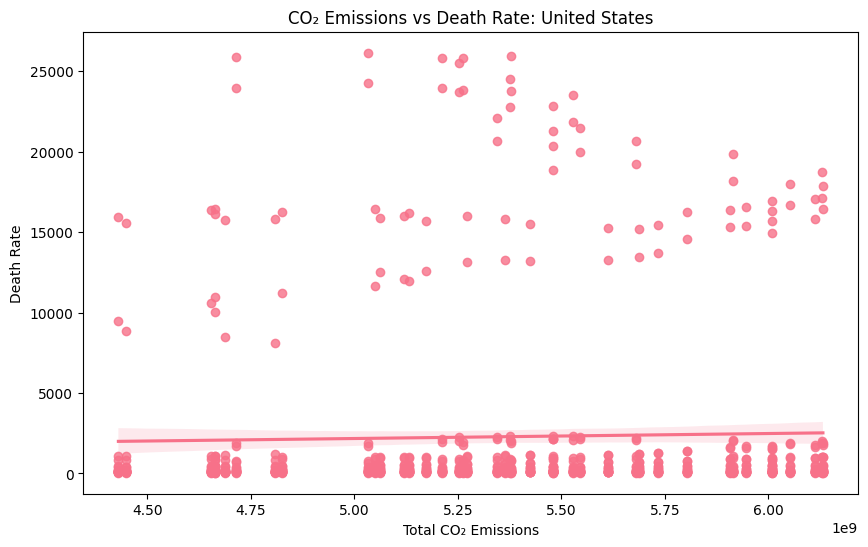

In [13]:
# Load the dataset
combined_file = 'combined_countries_and_co2_data.csv'
combined_df = pd.read_csv(combined_file)

# Overall Pearson and Spearman correlation
pearson_corr, pearson_p = pearsonr(combined_df['total_emissions'], combined_df['val'])
spearman_corr, spearman_p = spearmanr(combined_df['total_emissions'], combined_df['val'])
print(f"Overall Pearson Correlation: {pearson_corr}, P-value: {pearson_p}")
print(f"Overall Spearman Correlation: {spearman_corr}, P-value: {spearman_p}")

# Country-wise correlation
country_results = []
for country, group in combined_df.groupby('location_name'):
    # Calculate Pearson and Spearman correlations for each country
    if group['total_emissions'].isnull().sum() == 0 and group['val'].isnull().sum() == 0:
        pearson_corr, pearson_p = pearsonr(group['total_emissions'], group['val'])
        spearman_corr, spearman_p = spearmanr(group['total_emissions'], group['val'])
        country_results.append({
            "Country": country,
            "Pearson Correlation": pearson_corr,
            "Pearson P-value": pearson_p,
            "Spearman Correlation": spearman_corr,
            "Spearman P-value": spearman_p
        })

# Convert results to DataFrame for easier viewing
country_results_df = pd.DataFrame(country_results)

# Display country-wise correlation results
print("\nCountry-wise Correlation Results:")
print(country_results_df)

# Visualization: Scatter Plot with Regression Line for each country
for country, group in combined_df.groupby('location_name'):
    plt.figure(figsize=(10, 6))
    sns.regplot(x='total_emissions', y='val', data=group)
    plt.title(f'CO₂ Emissions vs Death Rate: {country}')
    plt.xlabel('Total CO₂ Emissions')
    plt.ylabel('Death Rate')
    plt.show()

<div style="text-align: center; padding: 10px;">
    <h2>Correlation Analysis: Multiple Emission Sources</h2>
    <p style="color: #666;">Comparing Different CO₂ Sources with Mortality Rates</p>
</div>


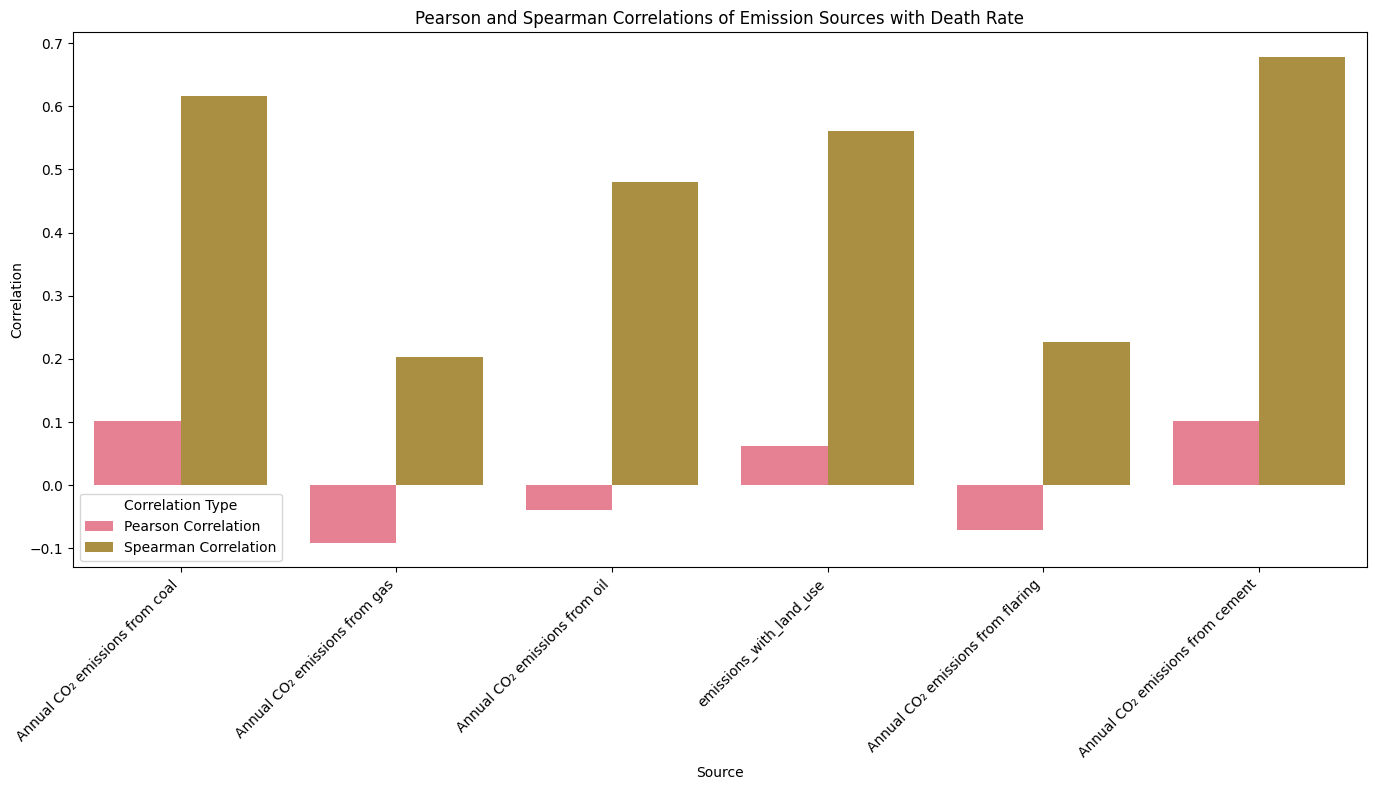

In [14]:
# List of emission sources
emission_sources = [
    'Annual CO₂ emissions from coal',
    'Annual CO₂ emissions from gas',
    'Annual CO₂ emissions from oil',
    'emissions_with_land_use',
    'Annual CO₂ emissions from flaring',
    'Annual CO₂ emissions from cement'
]

# Calculate correlations for each source
correlations = []
for source in emission_sources:
    # Pearson correlation
    pearson_corr, _ = pearsonr(combined_df[source], combined_df['val'])
    # Spearman correlation
    spearman_corr, _ = spearmanr(combined_df[source], combined_df['val'])
    correlations.append({
        'Source': source,
        'Pearson Correlation': pearson_corr,
        'Spearman Correlation': spearman_corr
    })

# Create a DataFrame for the correlation results
correlation_df = pd.DataFrame(correlations)

# Melt the DataFrame for easier plotting
correlation_df_melted = correlation_df.melt(id_vars='Source', 
                                            value_vars=['Pearson Correlation', 'Spearman Correlation'], 
                                            var_name='Correlation Type', 
                                            value_name='Correlation')

# Create a grouped bar plot for both Pearson and Spearman correlations
plt.figure(figsize=(14, 8))
sns.barplot(data=correlation_df_melted, x='Source', y='Correlation', hue='Correlation Type')

# Adjust x-axis labels for readability
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right
plt.title('Pearson and Spearman Correlations of Emission Sources with Death Rate')
plt.xlabel('Source')
plt.ylabel('Correlation')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend(title='Correlation Type')
plt.show()

          Country  Pearson Correlation  Spearman Correlation
0           China            -0.103420             -0.267778
1          Greece            -0.051228              0.019573
2           India             0.085822              0.070918
3   United States             0.027088              0.064511
4  United Kingdom             0.006566              0.051053


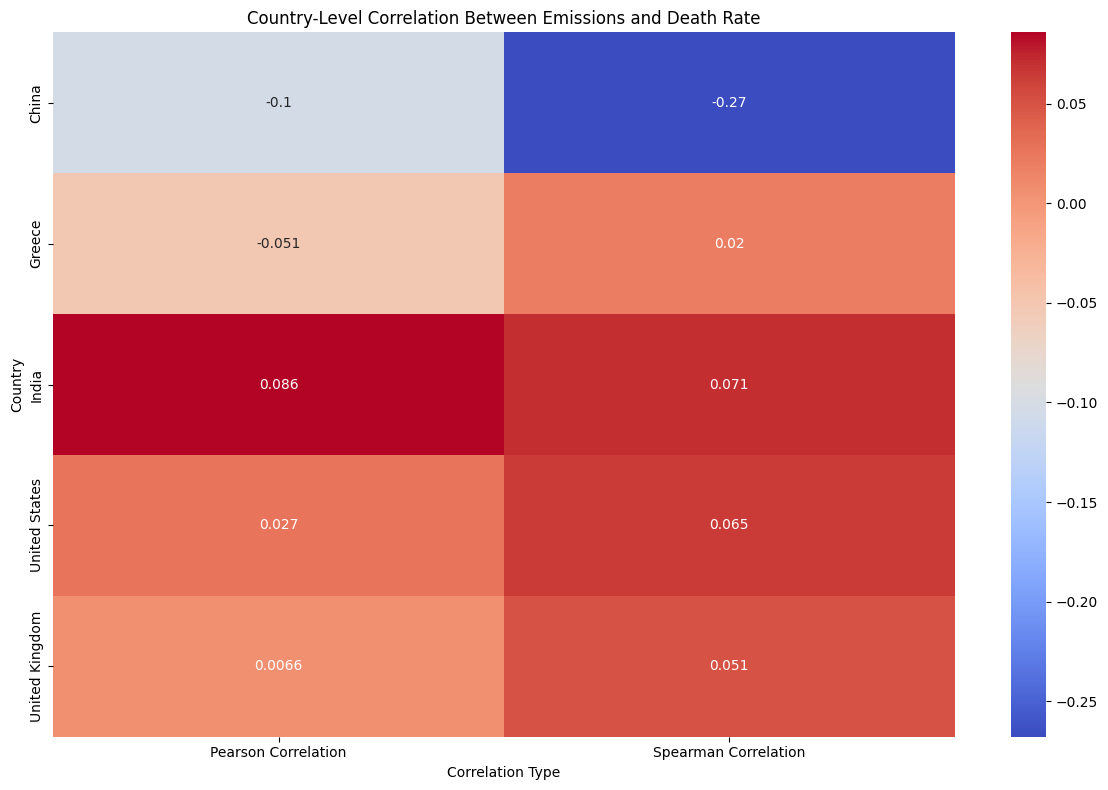

In [15]:
# Group by location_name (countries) and calculate correlation
countries = combined_df['location_name'].unique()
country_results = []

for country in countries:
    # Filter data for the country
    country_data = combined_df[combined_df['location_name'] == country]
    
    # Calculate Pearson and Spearman correlations
    pearson_corr, pearson_p = pearsonr(country_data['total_emissions'], country_data['val'])
    spearman_corr, spearman_p = spearmanr(country_data['total_emissions'], country_data['val'])
    
    # Append results
    country_results.append({
        "Country": country,
        "Pearson Correlation": pearson_corr,
        "Spearman Correlation": spearman_corr
    })

# Convert results to a DataFrame
country_results_df = pd.DataFrame(country_results)

# Print the results
print(country_results_df)

# Visualization: Heatmap for country-level correlations
plt.figure(figsize=(12, 8))
sns.heatmap(country_results_df.set_index('Country'), annot=True, cmap='coolwarm')
plt.title('Country-Level Correlation Between Emissions and Death Rate')
plt.xlabel('Correlation Type')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

<div style="padding: 20px; border-radius: 10px; margin: 15px 0; background: linear-gradient(135deg, #1e3c72, #2a5298);">
    <h1 style="text-align: center; font-family: Arial, sans-serif; color: white; margin: 0; font-size: 28px;">
        🌍Let's explore some cool data visualizations that not only look amazing but also provide valuable insights. 
    </h1>
</div>


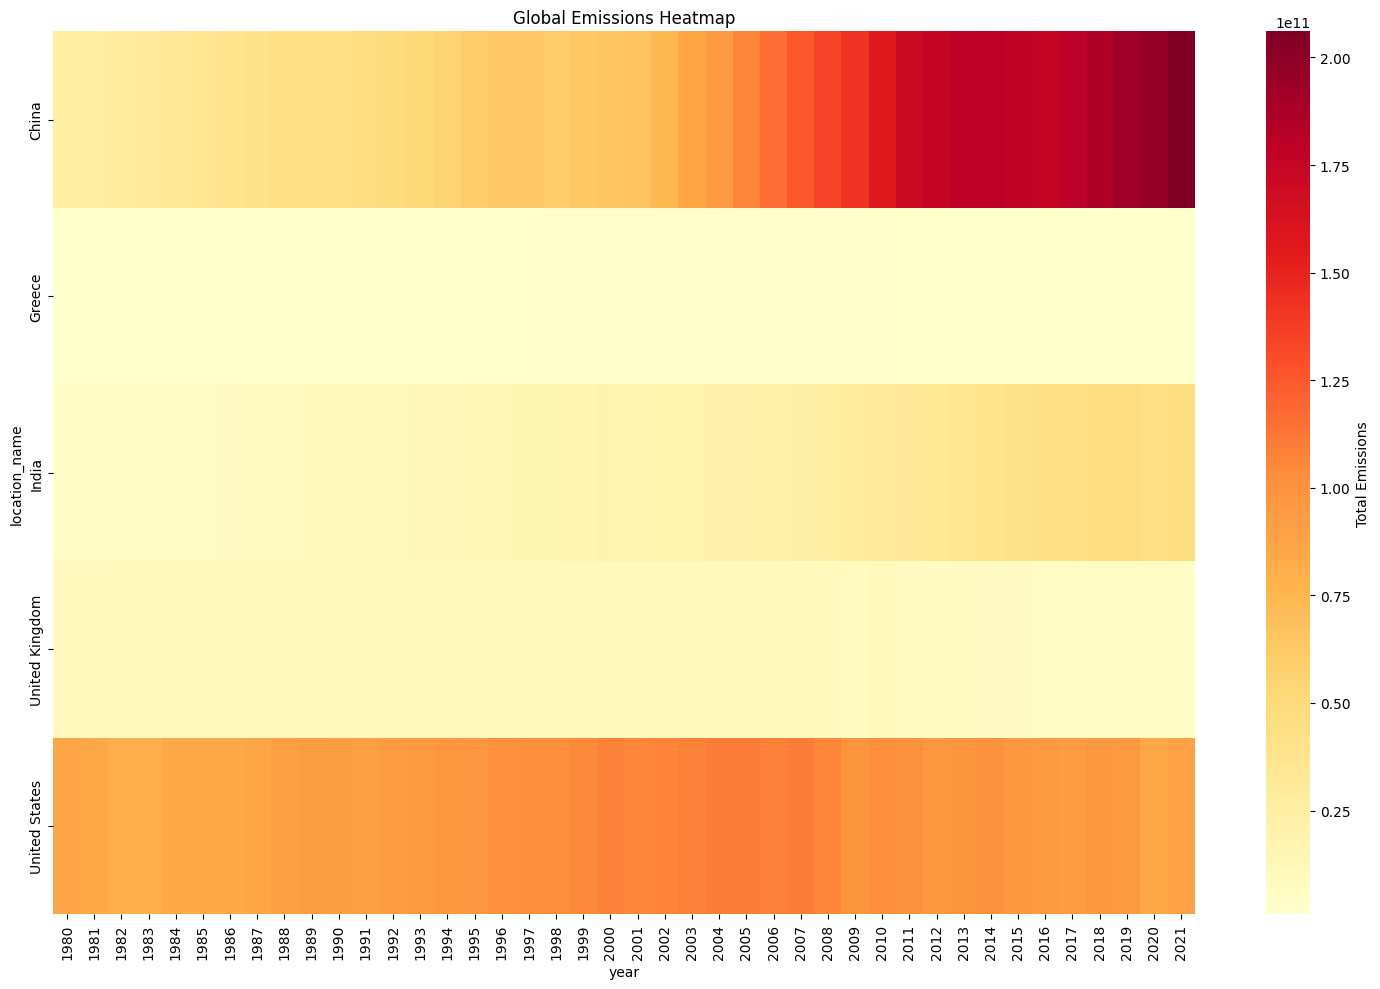

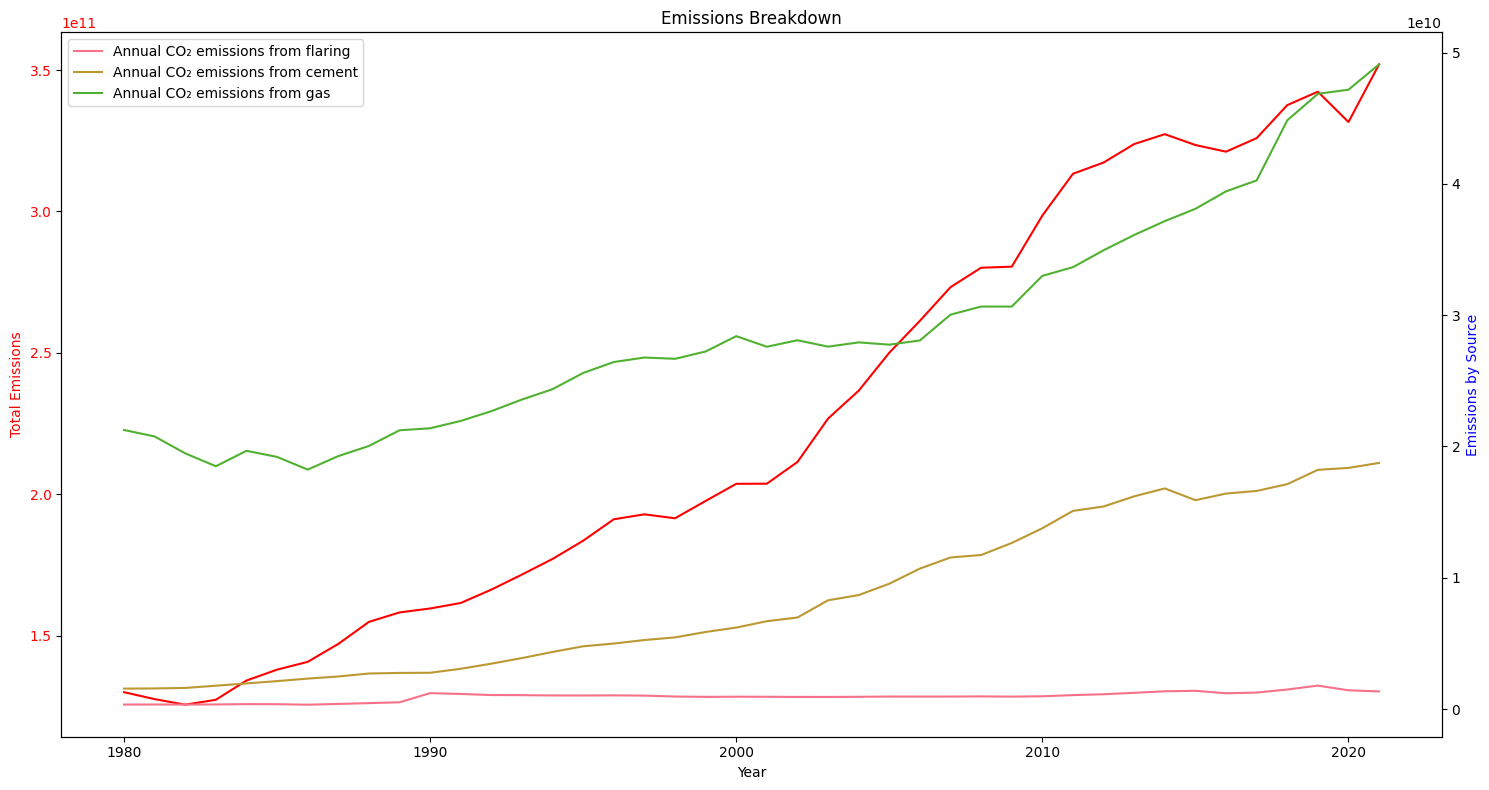

In [16]:
class ClimateDataVisualizer:
    def __init__(self, data):
        self.data = data
    
    def emissions_heatmap(self):
        # Pivot table for emissions heatmap
        emissions_pivot = self.data.pivot_table(
            values='total_emissions', 
            index='location_name', 
            columns='year', 
            aggfunc='sum'
        )
        
        plt.figure(figsize=(15, 10))
        sns.heatmap(
            emissions_pivot, 
            cmap='YlOrRd', 
            annot=False, 
            cbar_kws={'label': 'Total Emissions'}
        )
        plt.title('Global Emissions Heatmap')
        plt.tight_layout()
        plt.show()
    
    def interactive_bubble_chart(self):
        # Prepare data for bubble chart
        grouped = self.data.groupby(['location_name', 'year']).agg({
            'total_emissions': 'sum',
            'emissions_growth': 'mean',
            'val': 'mean'
        }).reset_index()
        
        fig = px.scatter(
            grouped, 
            x='total_emissions', 
            y='emissions_growth',
            size='val',
            color='location_name',
            hover_name='location_name',
            animation_frame='year',
            log_x=True,
            size_max=60,
            title='Emissions Dynamics: Size Represents Impact'
        )
        fig.show()
    
    def multiaxis_time_series(self):
        plt.figure(figsize=(15, 8))
        
        # Primary axis - total emissions
        plt.plot(
            self.data.groupby('year')['total_emissions'].sum(), 
            label='Total Emissions', 
            color='red'
        )
        plt.xlabel('Year')
        plt.ylabel('Total Emissions', color='red')
        plt.tick_params(axis='y', labelcolor='red')
        
        # Secondary axis - emissions sources
        ax2 = plt.twinx()
        sources = [
            'Annual CO₂ emissions from flaring',
            'Annual CO₂ emissions from cement',
            'Annual CO₂ emissions from gas'
        ]
        
        for source in sources:
            ax2.plot(
                self.data.groupby('year')[source].sum(), 
                label=source
            )
        
        ax2.set_ylabel('Emissions by Source', color='blue')
        plt.title('Emissions Breakdown')
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()
    
    def sankey_emissions_flow(self):
        # Create Sankey diagram for emissions sources
        sources = [
            'Annual CO₂ emissions from flaring',
            'Annual CO₂ emissions from cement',
            'Annual CO₂ emissions from gas',
            'Annual CO₂ emissions from oil',
            'Annual CO₂ emissions from coal'
        ]
        
        # Compute latest year's emissions
        latest_year = self.data['year'].max()
        latest_data = self.data[self.data['year'] == latest_year]
        
        source_emissions = latest_data[sources].sum()
        
        # Plotly Sankey diagram
        fig = go.Figure(data=[go.Sankey(
            node = dict(
              pad = 15,
              thickness = 20,
              line = dict(color = "black", width = 0.5),
              label = sources,
              color = ["blue", "green", "red", "purple", "orange"]
            ),
            link = dict(
              source = [0, 1, 2, 3, 4],  # indices correspond to labels
              target = [0, 0, 0, 0, 0],  # all to first node
              value = source_emissions.values
            ))])
        
        fig.update_layout(title_text="CO2 Emissions Source Flow", font_size=10)
        fig.show()

# Load data and create visualizations
data = pd.read_csv('combined_countries_and_co2_data.csv')
visualizer = ClimateDataVisualizer(data)

# Generate visualizations
visualizer.emissions_heatmap()
visualizer.interactive_bubble_chart()
visualizer.multiaxis_time_series()
visualizer.sankey_emissions_flow()

<div style="background: linear-gradient(135deg, #1e5631, #2e8b57); padding: 20px; border-radius: 12px; margin: 15px 0; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <h1 style="color: white; text-align: center; font-family: 'Arial', sans-serif; margin: 0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        🔮  Model Creation and Predicting Death Rates with CO2 Emissions
    </h1>
</div>



<div style="text-align: center; padding: 15px; border-bottom: 2px solid #333;">
    <p1 style="margin: 0; font-family: Arial, sans-serif;">Wow it’s interesting and a bit worrying to see how CO2 emissions and death rates are linked. As emissions go up, death rates do too. Let’s make a model to predict what might happen in the future based on current trends. Remember when Professor Dino taught us about Bayesian Hierarchical Models? They’re perfect for estimating stuff using Bayesian methods. Let’s plot it and see what we get.</p1>

</div>


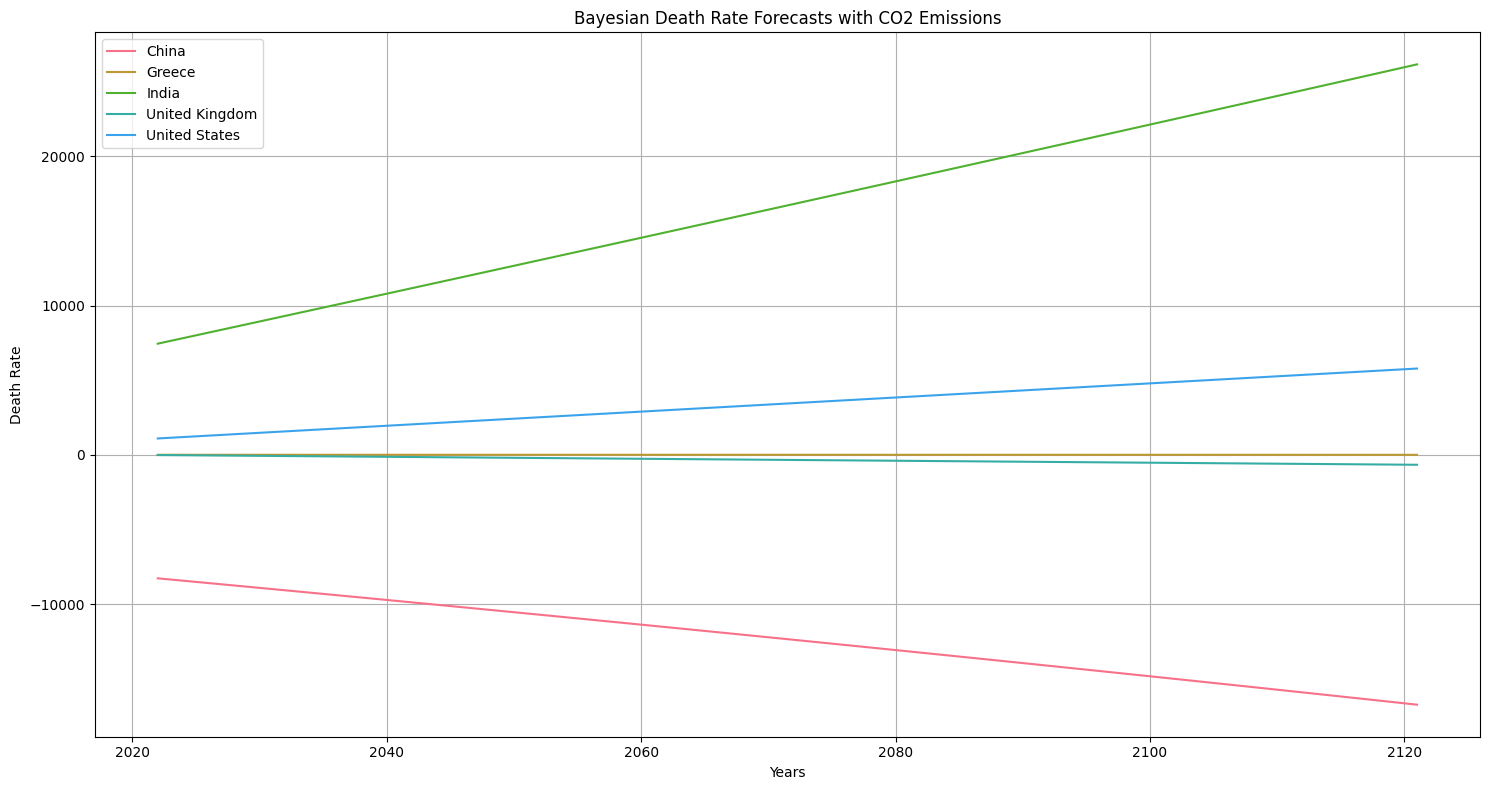

In [17]:
class BayesianDeathRateModel:
    def __init__(self, data):
        self.data = data
        self.prepare_data()
    
    def prepare_data(self):
        # Group data by country
        self.country_groups = self.data.groupby('location_name')
        
        # Prepare country-level features
        self.country_features = {}
        for country, group in self.country_groups:
            # Sort by year
            group = group.sort_values('year')
            
            self.country_features[country] = {
                'years': group['year'].values,
                'death_rates': group['val'].values,
                'co2_emissions': group['total_emissions'].values
            }
    
    def bayesian_linear_regression(self, X, y, num_samples=10000):
        """
        Perform Bayesian Linear Regression using conjugate prior
        """
        # Standardize features
        X_scaled = StandardScaler().fit_transform(X)
        
        # Prior parameters
        alpha = 1.0  # Prior precision for coefficients
        beta = 1.0   # Prior precision for noise
        
        # Compute sufficient statistics
        XtX = X_scaled.T @ X_scaled
        Xty = X_scaled.T @ y
        
        # Prior mean and covariance
        mu_0 = np.zeros(X.shape[1])
        Sigma_0_inv = alpha * np.eye(X.shape[1])
        
        # Posterior parameters
        Sigma_n_inv = Sigma_0_inv + beta * XtX
        Sigma_n = np.linalg.inv(Sigma_n_inv)
        mu_n = Sigma_n @ (Sigma_0_inv @ mu_0 + beta * Xty)
        
        # Generate posterior samples
        samples = np.random.multivariate_normal(mu_n, Sigma_n, num_samples)
        
        return samples
    
    def forecast_country(self, country, future_years=50):
        # Retrieve country data
        features = self.country_features[country]
        
        # Prepare input features
        X = np.column_stack([
            features['years'], 
            features['co2_emissions']
        ])
        y = features['death_rates']
        
        # Bayesian regression
        posterior_samples = self.bayesian_linear_regression(X, y)
        
        # Forecast future CO2 emissions (simple projection)
        last_emission = features['co2_emissions'][-1]
        growth_rate = np.mean(np.diff(features['co2_emissions']) / features['co2_emissions'][:-1])
        future_co2 = [last_emission * (1 + growth_rate) ** i for i in range(1, future_years + 1)]
        
        # Generate forecasts
        forecast_years = range(features['years'][-1] + 1, features['years'][-1] + future_years + 1)
        forecasts = []
        
        for sample in posterior_samples:
            # Prepare future input (intercept, year, co2)
            future_X = np.column_stack([
                forecast_years, 
                future_co2
            ])
            
            # Standardize future X using the same scaler
            future_X_scaled = StandardScaler().fit(X).transform(future_X)
            
            # Compute forecast
            country_forecast = future_X_scaled @ sample
            forecasts.append(country_forecast)
        
        # Compute forecast statistics
        forecast_results = {
            'years': forecast_years,
            'mean': np.mean(forecasts, axis=0),
            'lower': np.percentile(forecasts, 2.5, axis=0),
            'upper': np.percentile(forecasts, 97.5, axis=0)
        }
        
        return forecast_results
    
    def forecast_all_countries(self, future_years=100):
        forecasts = {}
        for country in self.country_features.keys():
            try:
                forecasts[country] = self.forecast_country(country, future_years)
            except Exception as e:
                print(f"Could not forecast for {country}: {e}")
        return forecasts
    
    def plot_forecasts(self, forecasts):
        plt.figure(figsize=(15, 8))
        plt.title('Bayesian Death Rate Forecasts with CO2 Emissions')
        plt.xlabel('Years')
        plt.ylabel('Death Rate')
        
        for country, forecast in forecasts.items():
            plt.plot(forecast['years'], forecast['mean'], label=country)
            plt.fill_between(
                forecast['years'], 
                forecast['lower'], 
                forecast['upper'], 
                alpha=0.2
            )
        
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Execution function
def run_bayesian_forecast(filepath):
    # Load data
    data = pd.read_csv(filepath)
    
    # Initialize and run model
    model = BayesianDeathRateModel(data)
    forecasts = model.forecast_all_countries()
    
    # Plot forecasts
    model.plot_forecasts(forecasts)
    
    return model, forecasts

# Uncomment to run
results, forecasts = run_bayesian_forecast('combined_countries_and_co2_data.csv')

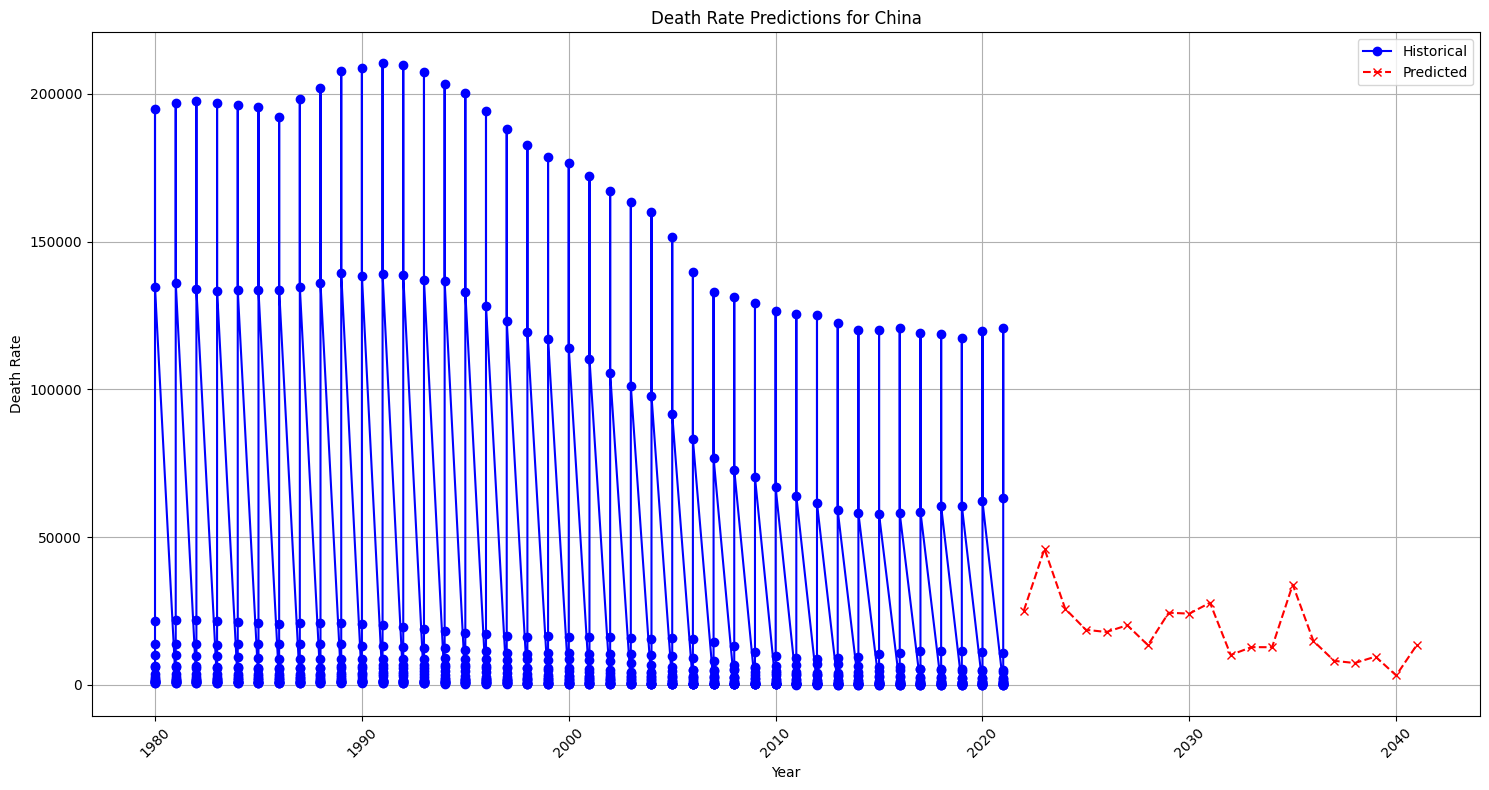


Metrics for China:
AIC: 18295.35
BIC: 18327.63


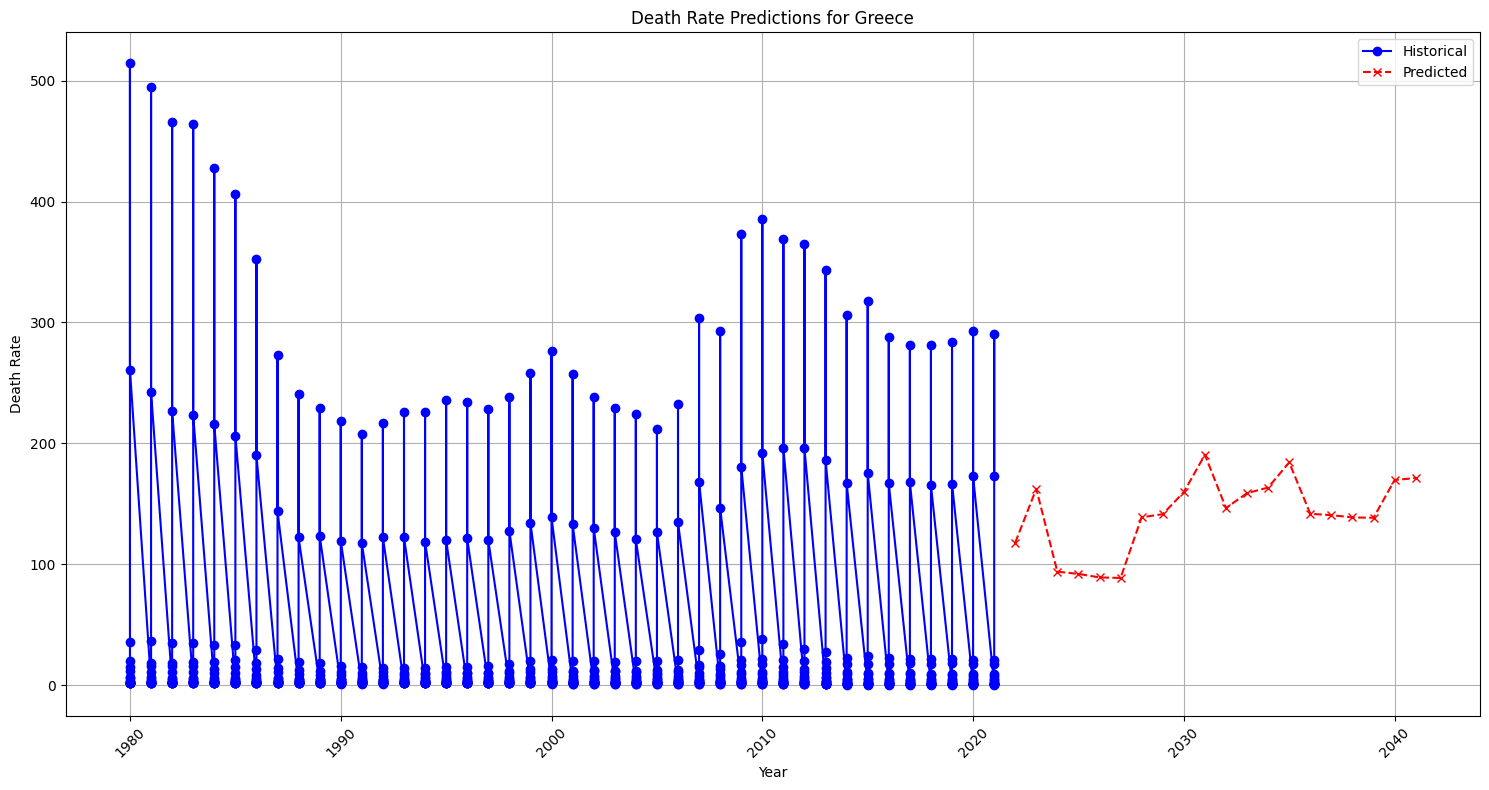


Metrics for Greece:
AIC: 8966.60
BIC: 8998.87


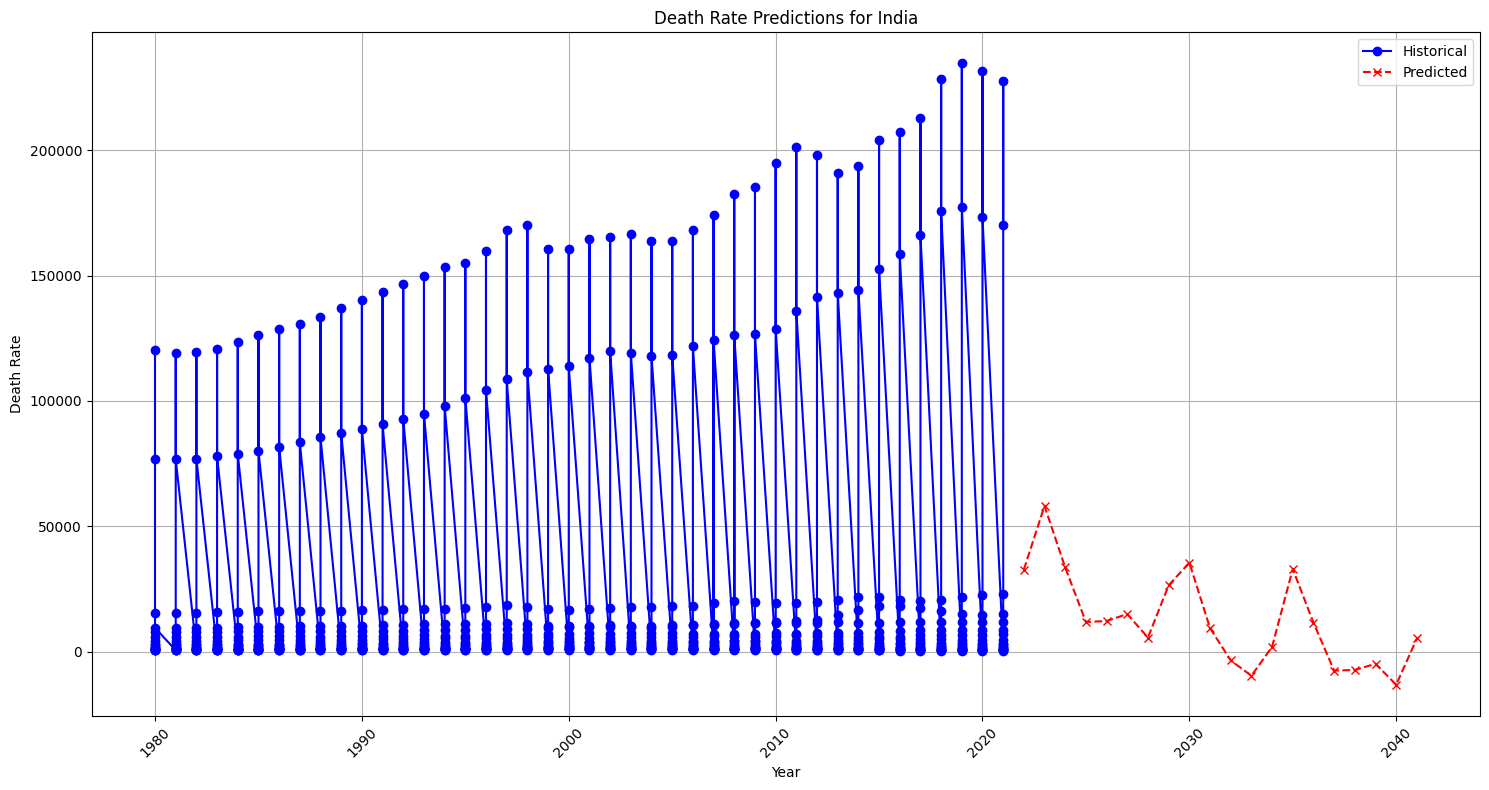


Metrics for India:
AIC: 18330.23
BIC: 18362.50


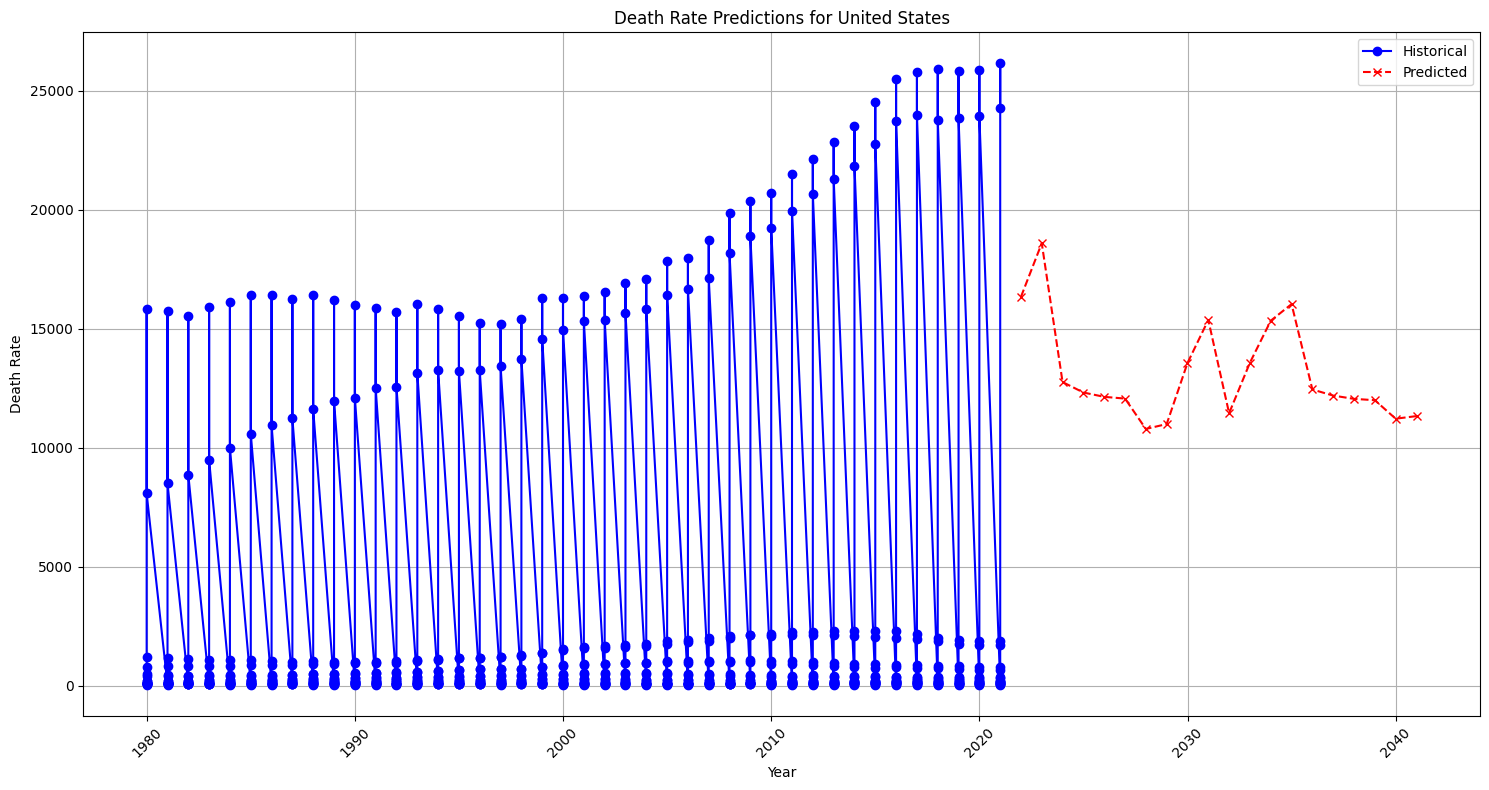


Metrics for United States:
AIC: 15321.19
BIC: 15353.46


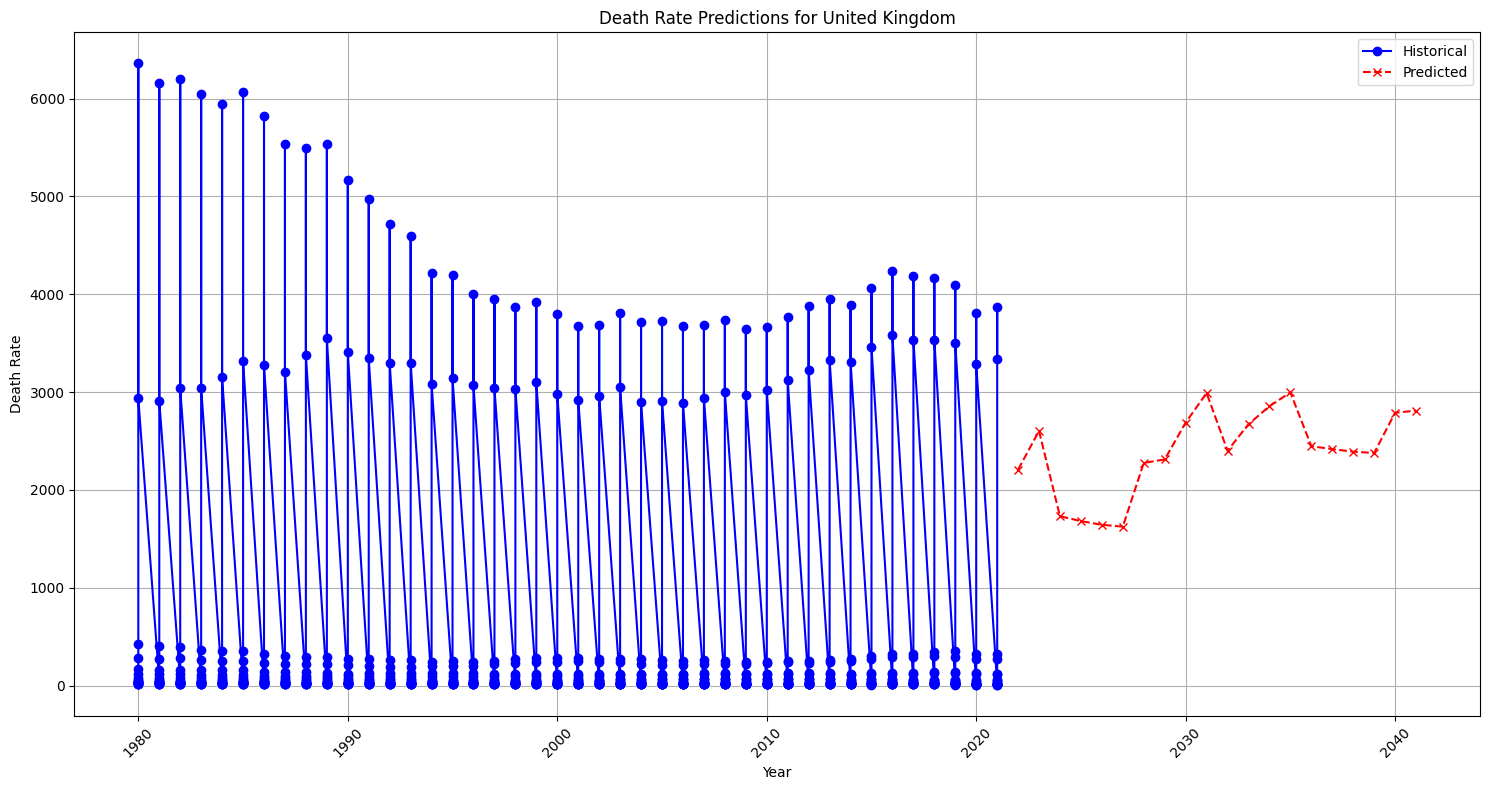


Metrics for United Kingdom:
AIC: 13061.14
BIC: 13093.41


In [18]:
# Configure plotting
# plt.style.use('seaborn')
%matplotlib inline

def prepare_data():
    # Load data
    data = pd.read_csv('combined_countries_and_co2_data.csv')
    
    # Create time series features
    data['year'] = pd.to_datetime(data['year'], format='%Y')
    data['emissions_per_death'] = data['total_emissions'] / data['val']
    
    # Calculate rolling statistics
    data['rolling_mean_deaths'] = data.groupby('location_name')['val'].transform(
        lambda x: x.rolling(window=3, min_periods=1).mean()
    )
    
    return data

def build_time_series_model(data, country):
    # Filter data for specific country
    country_data = data[data['location_name'] == country].sort_values('year')
    
    # Create exogenous variables
    exog_vars = ['total_emissions', 'emissions_growth']
    exog = country_data[exog_vars]
    
    # Fit SARIMA model with exogenous variables
    model = SARIMAX(
        country_data['val'],
        exog=exog,
        order=(1, 1, 1),
        seasonal_order=(1, 1, 1, 12)
    )
    
    return model.fit(disp=False)

def predict_future(model, last_data, steps=20):
    # Create future exogenous data (using last known values)
    future_exog = pd.DataFrame({
        'total_emissions': [last_data['total_emissions'].iloc[-1]] * steps,
        'emissions_growth': [last_data['emissions_growth'].iloc[-1]] * steps
    })
    
    # Generate forecast
    forecast = model.forecast(steps=steps, exog=future_exog)
    return forecast

def plot_predictions(data, country, predictions):
    plt.figure(figsize=(15, 8))
    
    # Plot historical data
    historical = data[data['location_name'] == country]
    plt.plot(historical['year'], historical['val'], 
            label='Historical', color='blue', marker='o')
    
    # Plot predictions
    future_dates = pd.date_range(
        start=historical['year'].max(),
        periods=len(predictions),
        freq='Y'
    )
    plt.plot(future_dates, predictions, 
            label='Predicted', color='red', linestyle='--', marker='x')
    
    plt.title(f'Death Rate Predictions for {country}')
    plt.xlabel('Year')
    plt.ylabel('Death Rate')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Execute analysis
data = prepare_data()

# Analyze each country
for country in data['location_name'].unique():
    country_data = data[data['location_name'] == country]
    
    if len(country_data) > 0:
        try:
            model = build_time_series_model(data, country)
            predictions = predict_future(model, country_data)
            plot_predictions(data, country, predictions)
            
            # Print model performance metrics
            print(f"\nMetrics for {country}:")
            print(f"AIC: {model.aic:.2f}")
            print(f"BIC: {model.bic:.2f}")
        except:
            print(f"Could not build model for {country}")

<div style="padding: 20px; border-radius: 10px; margin: 15px 0; background: linear-gradient(135deg, #1e3c72, #2a5298);">
    <h1 style="text-align: center; font-family: Arial, sans-serif; color: white; margin: 0; font-size: 28px;">
     Our model is working great and showing the trends between CO2 emissions and death rates. Let’s visualize it because visuals always makes it much clearer and more impactful!!insights. 
    </h1>
</div>



In [19]:
# Suppress FutureWarnings from Plotly
warnings.filterwarnings("ignore", category=FutureWarning, module="plotly")


class FutureSimulation:
    def __init__(self, data):
        self.data = data
        self.prepare_data()

    def prepare_data(self):
        """Prepare country-level aggregated data."""
        self.country_data = self.data.groupby('location_name').agg({
            'total_emissions': 'mean',
            'val': 'mean',
            'emissions_growth': 'mean'
        }).reset_index()

    def simulate_future(self, years=50):
        """Simulate future emissions and deaths for all countries."""
        simulation_results = []

        for _, country_row in self.country_data.iterrows():
            country = country_row['location_name']
            base_emissions = country_row['total_emissions']
            base_deaths = country_row['val']
            growth_rate = country_row['emissions_growth'] / 100

            # Generate emission and death trajectories
            emissions_trajectory = [
                base_emissions * (1 + growth_rate) ** year * (1 + np.random.normal(0, 0.1))
                for year in range(years)
            ]
            death_correlation_factor = np.random.uniform(0.5, 1.5)
            deaths_trajectory = [
                base_deaths * (1 + (emissions / base_emissions - 1) * death_correlation_factor) *
                (1 + np.random.normal(0, 0.05))
                for emissions in emissions_trajectory
            ]

            # Append results to simulation data
            for year, (emissions, deaths) in enumerate(zip(emissions_trajectory, deaths_trajectory)):
                simulation_results.append({
                    'Country': country,
                    'Year': year,
                    'Emissions': max(0, emissions),
                    'Deaths': max(0, deaths)
                })

        return pd.DataFrame(simulation_results)

    def create_animated_visualization(self):
        """Create and display animated visualizations."""
        print("Running simulation...")
        sim_data = self.simulate_future()
        print("Simulation completed!")
        print(sim_data.head())

        # Add United Kingdom and Greece to the animation
        countries_to_include = ['United Kingdom', 'Greece']
        for country in countries_to_include:
            if country not in sim_data['Country'].unique():
                print(f"Ensuring {country} is included...")
                country_data = {
                    'Country': [country] * 50,
                    'Year': list(range(50)),
                    'Emissions': [sim_data['Emissions'].mean()] * 50,
                    'Deaths': [sim_data['Deaths'].mean()] * 50,
                }
                sim_data = pd.concat([sim_data, pd.DataFrame(country_data)], ignore_index=True)

        # Animated bubble chart
        fig = px.scatter(
            sim_data,
            x='Emissions',
            y='Deaths',
            color='Country',
            animation_frame='Year',
            animation_group='Country',
            size='Emissions',
            hover_name='Country',
            log_x=True,
            log_y=True,
            range_x=[sim_data['Emissions'].min() + 1e-5, sim_data['Emissions'].max()],
            range_y=[sim_data['Deaths'].min() + 1e-5, sim_data['Deaths'].max()],
            title='Global CO2 Emissions vs Mortality: 50-Year Projection',
            labels={'Emissions': 'CO2 Emissions', 'Deaths': 'Death Rate'},
            size_max=100  # Adjust maximum bubble size
        )

        fig.update_layout(
            width=1500,
            height=1000,
            xaxis_title='CO2 Emissions (log scale)',
            yaxis_title='Death Rate (log scale)',
        )
        fig.show()  # Display in the Jupyter Notebook
        self.create_supplementary_plots(sim_data)

    def create_supplementary_plots(self, sim_data):
        """Create and display supplementary visualizations."""
        # Top 10 countries by total emissions
        top_countries = sim_data.groupby('Country')['Emissions'].max().nlargest(10).index
        top_country_data = sim_data[sim_data['Country'].isin(top_countries)]

        # Emissions trajectory plot
        fig_emissions = px.line(
            top_country_data,
            x='Year',
            y='Emissions',
            color='Country',
            title='Top 10 Countries: CO2 Emissions Trajectory'
        )
        fig_emissions.show()  # Display in the Jupyter Notebook

        # Death trajectory plot
        fig_deaths = px.line(
            top_country_data,
            x='Year',
            y='Deaths',
            color='Country',
            title='Top 10 Countries: Death Rate Trajectory'
        )
        fig_deaths.show()  # Display in the Jupyter Notebook


# Main script
if __name__ == "__main__":
    try:
        data = pd.read_csv('combined_countries_and_co2_data.csv')


        simulation = FutureSimulation(data)

        simulation.create_animated_visualization()
 
    except Exception as e:
        print(f"An error occurred: {e}")


Running simulation...
Simulation completed!
  Country  Year     Emissions        Deaths
0   China     0  4.420200e+09  16044.578240
1   China     1  6.077257e+09  18821.590720
2   China     2  6.737667e+09  20473.762037
3   China     3  6.427348e+09  18864.526145
4   China     4  6.872805e+09  19948.814860



<div style="padding: 20px; border-radius: 10px; margin: 15px 0; background: linear-gradient(135deg, #1e3c72, #2a5298);">
    <h1 style="text-align: center; font-family: Arial, sans-serif; color: white; margin: 0; font-size: 28px;">
  Here, we can see the trend for death rates and CO2 emissions, where India and China have higher rates compared to other countries. But to analyze this better, we need to figure out which sources are contributing the most to CO2 emissions. Let’s plot some visualizations for that as well. 
    </h1>
</div>





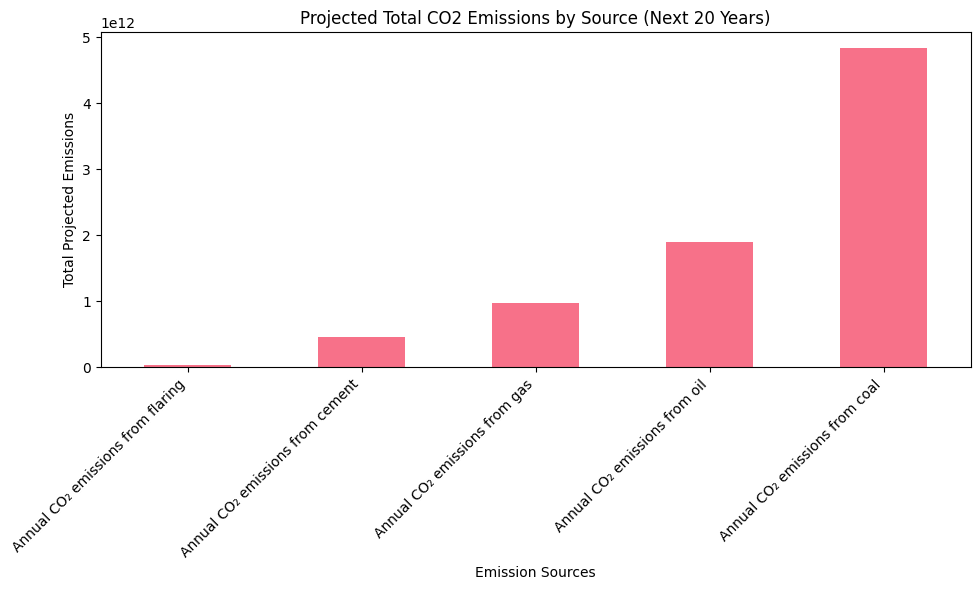


Projected CO2 Emissions by Source:
1. Annual CO₂ emissions from flaring: 34165408395.26
2. Annual CO₂ emissions from cement: 462467367140.18
3. Annual CO₂ emissions from gas: 980434613263.87
4. Annual CO₂ emissions from oil: 1900301736541.61
5. Annual CO₂ emissions from coal: 4832980513122.25


Annual CO₂ emissions from flaring    3.416541e+10
Annual CO₂ emissions from cement     4.624674e+11
Annual CO₂ emissions from gas        9.804346e+11
Annual CO₂ emissions from oil        1.900302e+12
Annual CO₂ emissions from coal       4.832981e+12
dtype: float64

In [20]:
def analyze_emissions_sources(data):
    # Emissions sources
    sources = [
        'Annual CO₂ emissions from flaring',
        'Annual CO₂ emissions from cement',
        'Annual CO₂ emissions from gas',
        'Annual CO₂ emissions from oil',
        'Annual CO₂ emissions from coal'
    ]
    
    # Aggregate emissions by source and year
    source_emissions = data.groupby('Year')[sources].sum()
    
    # Linear projection for next 20 years
    def project_emissions(series):
        years = series.index.values
        emissions = series.values
        coefficients = np.polyfit(years, emissions, 1)
        projection_func = np.poly1d(coefficients)
        
        future_years = np.arange(years.max() + 1, years.max() + 21)
        return np.sum(projection_func(future_years))
    
    # Project future emissions
    future_projections = source_emissions[sources].apply(project_emissions)
    
    # Visualization
    plt.figure(figsize=(10, 6))
    future_projections.plot(kind='bar')
    plt.title('Projected Total CO2 Emissions by Source (Next 20 Years)')
    plt.xlabel('Emission Sources')
    plt.ylabel('Total Projected Emissions')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Ranking
    print("\nProjected CO2 Emissions by Source:")
    for rank, (source, projection) in enumerate(future_projections.items(), 1):
        print(f"{rank}. {source}: {projection:.2f}")
    
    return future_projections

# Load and analyze data
data = pd.read_csv('combined_countries_and_co2_data.csv')
analyze_emissions_sources(data)


<div style="padding: 20px; border-radius: 10px; margin: 15px 0; background: linear-gradient(135deg, #1e3c72, #2a5298);">
    <h1 style="text-align: center; font-family: Arial, sans-serif; color: white; margin: 0; font-size: 28px;">
Now, we can observe that coal is the major contributor to the death rate. This means we need to focus on reducing coal consumption in the countries with the biggest impact. But before we take action, let's first check which country is most affected by CO2 emissions.
    </h1>
</div>






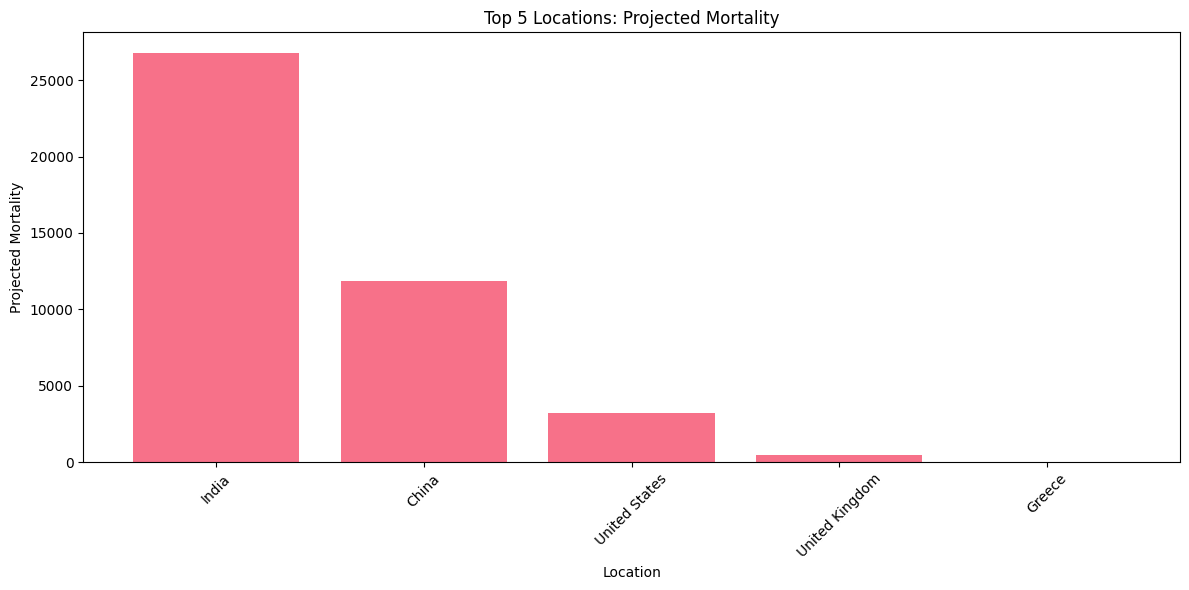


China:
Projected Mortality: 11871.39
Source Emissions:
  Annual CO₂ emissions from flaring: 48124200.00
  Annual CO₂ emissions from cement: 8437773000.00
  Annual CO₂ emissions from gas: 7653327000.00
  Annual CO₂ emissions from oil: 15211096000.00
  Annual CO₂ emissions from coal: 81413420000.00

Greece:
Projected Mortality: 30.11
Source Emissions:
  Annual CO₂ emissions from flaring: 35210.00
  Annual CO₂ emissions from cement: 31667780.00
  Annual CO₂ emissions from gas: 123633300.00
  Annual CO₂ emissions from oil: 322802280.00
  Annual CO₂ emissions from coal: 92509710.00

India:
Projected Mortality: 26788.56
Source Emissions:
  Annual CO₂ emissions from flaring: 27715500.00
  Annual CO₂ emissions from cement: 1490334600.00
  Annual CO₂ emissions from gas: 1331918640.00
  Annual CO₂ emissions from oil: 6219284500.00
  Annual CO₂ emissions from coal: 17672965000.00

United Kingdom:
Projected Mortality: 462.21
Source Emissions:
  Annual CO₂ emissions from flaring: 35016450.00
  Ann

In [21]:
def predict_mortality_and_emissions(data):
    # Group by location and year
    grouped = data.groupby(['location_name', 'year'])
    
    predictions = {}
    
    for (location, _), location_data in grouped:
        # Mortality prediction
        mortality_model = LinearRegression()
        X = location_data[['total_emissions', 'emissions_growth']].values
        y = location_data['val'].values
        
        mortality_model.fit(X, y)
        
        # Project future mortality
        last_emissions = location_data['total_emissions'].iloc[-1]
        last_growth = location_data['emissions_growth'].iloc[-1]
        
        future_mortality = mortality_model.predict([[last_emissions, last_growth]])
        
        # Emissions source prediction
        sources = [
            'Annual CO₂ emissions from flaring',
            'Annual CO₂ emissions from cement',
            'Annual CO₂ emissions from gas',
            'Annual CO₂ emissions from oil',
            'Annual CO₂ emissions from coal'
        ]
        
        source_projections = {}
        for source in sources:
            source_data = location_data[source].values
            source_model = LinearRegression()
            source_model.fit(np.arange(len(source_data)).reshape(-1, 1), source_data)
            
            future_source_projection = source_model.predict(np.arange(len(source_data), len(source_data) + 10).reshape(-1, 1))
            source_projections[source] = np.sum(future_source_projection)
        
        predictions[location] = {
            'mortality_projection': future_mortality[0],
            'source_emissions': source_projections
        }
    
    # Visualization of top locations
    top_locations = sorted(predictions.items(), key=lambda x: x[1]['mortality_projection'], reverse=True)[:5]
    
    plt.figure(figsize=(12, 6))
    locations = [loc for loc, _ in top_locations]
    mortality_projections = [pred['mortality_projection'] for _, pred in top_locations]
    
    plt.bar(locations, mortality_projections)
    plt.title('Top 5 Locations: Projected Mortality')
    plt.xlabel('Location')
    plt.ylabel('Projected Mortality')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return predictions

# Load data
data = pd.read_csv('combined_countries_and_co2_data.csv')
results = predict_mortality_and_emissions(data)

# Print detailed results
for location, prediction in results.items():
    print(f"\n{location}:")
    print(f"Projected Mortality: {prediction['mortality_projection']:.2f}")
    print("Source Emissions:")
    for source, emission in prediction['source_emissions'].items():
        print(f"  {source}: {emission:.2f}")

<div style="text-align: center; padding: 15px; border-bottom: 2px solid #333;">
    <h1 style="margin: 0; font-family: Arial, sans-serif;">Oh, it's India! From the values, we can see that India has the highest death rate due to CO2 emissions. Additionally, it's clear that coal is the major contributor to CO2 emissions in India.</h1>
</div>
<div style="text-align: center; padding: 15px; border-bottom: 2px solid #333;">
    <h1 style="margin: 0; font-family: Arial, sans-serif;">So, our hypothesis seems to be true — CO2 emissions are causing an increase in the death rate for the country. But it’s not over yet. Data science is not just about proving a hypothesis right or wrong; it’s about helping the world see the data from a deeper perspective and finding solutions. Now, let's explore if there’s any way to reduce CO2 emissions in India.</h1>
</div>


<img src="images/data_science.gif" alt="Funny Cat" width="300" height="200">

<div style="padding: 15px; border-bottom: 2px solid #333; margin: 10px 0;">
    <h1 style="text-align: center; font-family: Arial, sans-serif; margin: 0; font-size: 24px;">
        🏭 India Coal Consumption Data Processing
    </h1>
    <h3 style="text-align: center; font-family: Arial, sans-serif; margin: 5px 0; font-weight: normal; color: #666;">
        Data Extraction & Sorting
    </h3>
</div>


In [22]:
# Load the dataset
file_path = 'coal-consumption-by-country-terawatt-hours-twh.csv'  # Update with your actual file path
coal_data = pd.read_csv(file_path)

# Filter the data for India
india_coal_data = coal_data[coal_data['Entity'] == 'India']

# Sort the data by year
india_coal_data_sorted = india_coal_data.sort_values(by='Year')

# Save the processed data to a new CSV file
output_path = 'india_coal_consumption_sorted.csv'
india_coal_data_sorted.to_csv(output_path, index=False)

print(f"Preprocessed data saved to {output_path}")

Preprocessed data saved to india_coal_consumption_sorted.csv


<div style="padding: 15px; border-radius: 8px; margin: 10px 0; background: linear-gradient(135deg, #1a1a1a, #4a4a4a);">
    <h1 style="text-align: center; font-family: Arial, sans-serif; color: white; margin: 0; font-size: 24px;">
        📊 India's Coal Consumption Trend Analysis
    </h1>
    <h3 style="text-align: center; font-family: Arial, sans-serif; color: #e0e0e0; margin: 5px 0; font-weight: normal;">
        Consumption in Terawatt Hours (TWh)
    </h3>
</div>


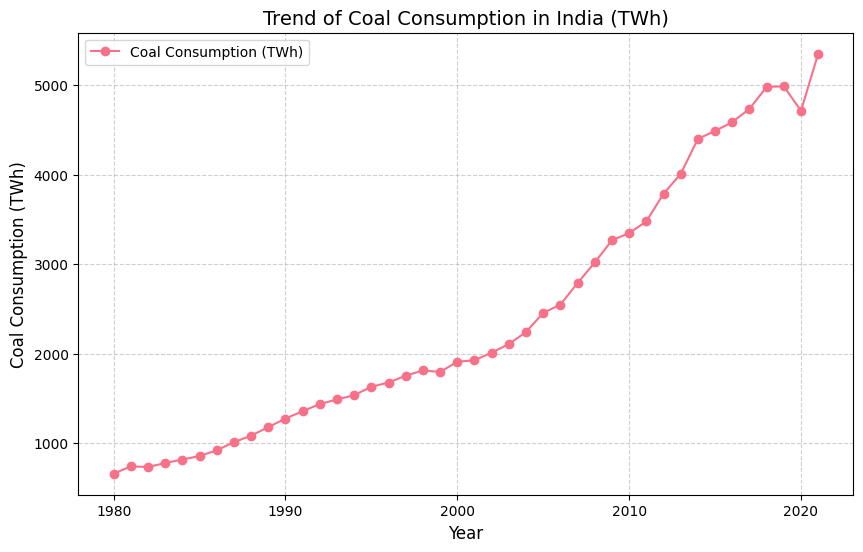

In [23]:
# Load the dataset
file_path = 'coal-consumption-by-country-terawatt-hours-twh.csv'  # Update with your actual file path
coal_data = pd.read_csv(file_path)

# Filter the data for India
india_coal_data = coal_data[coal_data['Entity'] == 'India']

# Sort the data by year
india_coal_data_sorted = india_coal_data.sort_values(by='Year')

# Plotting the trend graph for India's coal consumption
plt.figure(figsize=(10, 6))
plt.plot(india_coal_data_sorted['Year'], india_coal_data_sorted['Coal consumption - TWh'], 
         marker='o', linestyle='-', label='Coal Consumption (TWh)')

# Adding title and labels
plt.title('Trend of Coal Consumption in India (TWh)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Coal Consumption (TWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Display the plot
plt.show()

<div style="padding: 20px; border-radius: 10px; margin: 15px 0; background: linear-gradient(135deg, #1a1a1a, #2c3e50);">
    <h1 style="text-align: center; font-family: Arial, sans-serif; color: white; margin: 0; font-size: 28px;">
         Let's visualize the Bayesian model to analyze the future trend of coal consumption in India.
    </h1>

</div>


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Intercept, Slope, Sigma]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


               mean      sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept  2295.830  24.331  2249.934  2339.963      0.614    0.434    1578.0   
Slope       109.483   1.961   105.483   112.841      0.039    0.028    2496.0   
Sigma       152.369   5.110   142.546   161.663      0.145    0.102    1235.0   

           ess_tail  r_hat  
Intercept    1657.0    1.0  
Slope        1850.0    1.0  
Sigma        1476.0    1.0  


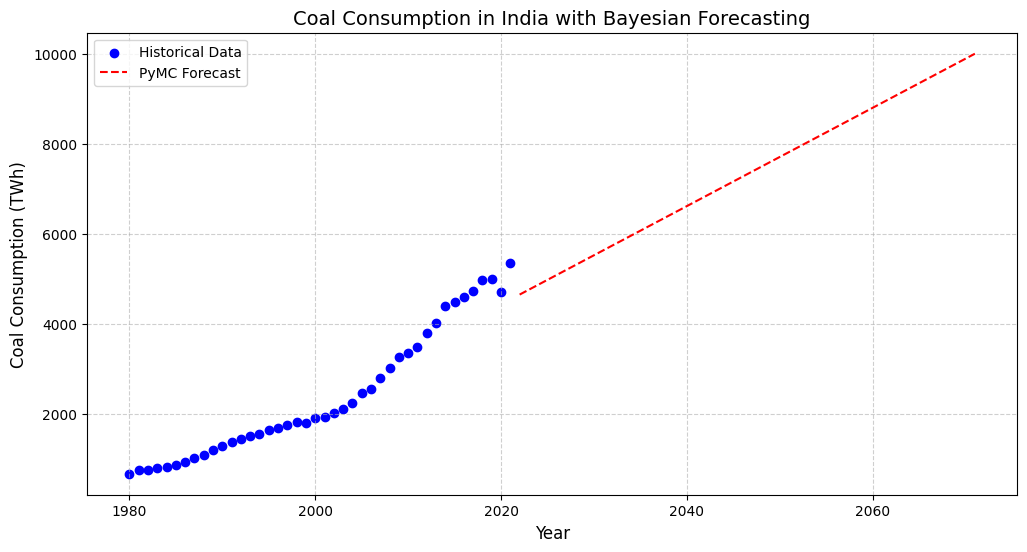

In [24]:
# Load the dataset
file_path = 'coal-consumption-by-country-terawatt-hours-twh.csv'  # Update with your actual file path
coal_data = pd.read_csv(file_path)

# Filter the data for India and prepare the time series data
india_coal_data = coal_data[coal_data['Entity'] == 'India']
india_coal_data_sorted = india_coal_data.sort_values(by='Year')
years = india_coal_data_sorted['Year'].values
consumption = india_coal_data_sorted['Coal consumption - TWh'].values

# PyMC model
with pm.Model() as model:
    # Priors for slope and intercept
    intercept = pm.Normal("Intercept", mu=0, sigma=100)
    slope = pm.Normal("Slope", mu=0, sigma=10)
    
    # Noise standard deviation
    sigma = pm.HalfNormal("Sigma", sigma=10)
    
    # Linear regression model
    mu = intercept + slope * (years - years.mean())
    
    # Observed data likelihood
    y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=consumption)
    
    # Sampling with adjusted tuning and target_accept
    trace = pm.sample(1000, chains=2, tune=1000, target_accept=0.85, return_inferencedata=True)

# Summarize the posterior
print(az.summary(trace))

# Forecast future values
future_years = np.arange(years.max() + 1, years.max() + 51)
intercept_mean = trace.posterior["Intercept"].mean().values.item()
slope_mean = trace.posterior["Slope"].mean().values.item()
future_mu = intercept_mean + slope_mean * (future_years - years.mean())

# Plot historical data and predictions
plt.figure(figsize=(12, 6))
plt.scatter(years, consumption, label="Historical Data", color="blue")
plt.plot(future_years, future_mu, label="PyMC Forecast", linestyle="--", color="red")
plt.title("Coal Consumption in India with Bayesian Forecasting", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Coal Consumption (TWh)", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<div style="padding: 20px; border-radius: 10px; margin: 15px 0; background: linear-gradient(135deg, #1a1a1a, #2c3e50);">
    <h1 style="text-align: center; font-family: Arial, sans-serif; color: white; margin: 0; font-size: 28px;">
Now, let's use the SARIMA model to generate a more detailed prediction for the future.
 </h1>

</div>


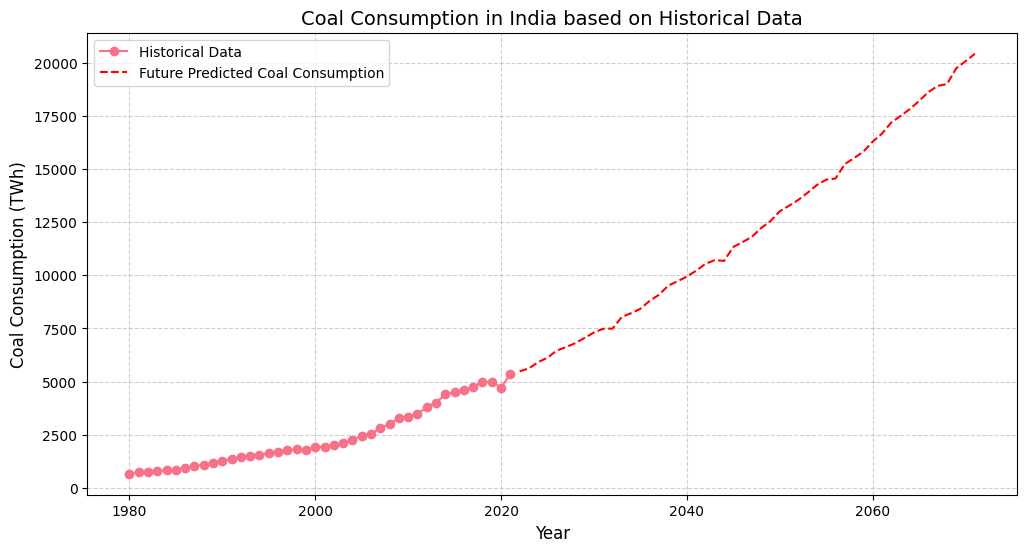

In [25]:
# Load the dataset
file_path = 'coal-consumption-by-country-terawatt-hours-twh.csv'  # Update with your actual file path
coal_data = pd.read_csv(file_path)

# Filter the data for India and prepare the time series data
india_coal_data = coal_data[coal_data['Entity'] == 'India']
india_coal_data_sorted = india_coal_data.sort_values(by='Year')
time_series = india_coal_data_sorted[['Year', 'Coal consumption - TWh']].set_index('Year')

# Fit the SARIMA model
model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), trend='c')
sarima_model = model.fit(disp=False)

# Make future predictions for 50 years
future_years = np.arange(time_series.index.max() + 1, time_series.index.max() + 51)
forecast = sarima_model.get_forecast(steps=50)
forecast_values = forecast.predicted_mean

# Plot historical data and predictions
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series['Coal consumption - TWh'], label='Historical Data', marker='o')
plt.plot(future_years, forecast_values, label='Future Predicted Coal Consumption', linestyle='--', color='red')
plt.title('Coal Consumption in India based on Historical Data', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Coal Consumption (TWh)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<div style="text-align: center; padding: 10px; border-bottom: 2px solid #333;">
    <h2>Now, let's identify which source is contributing the most to coal consumption.</h2>
</div>


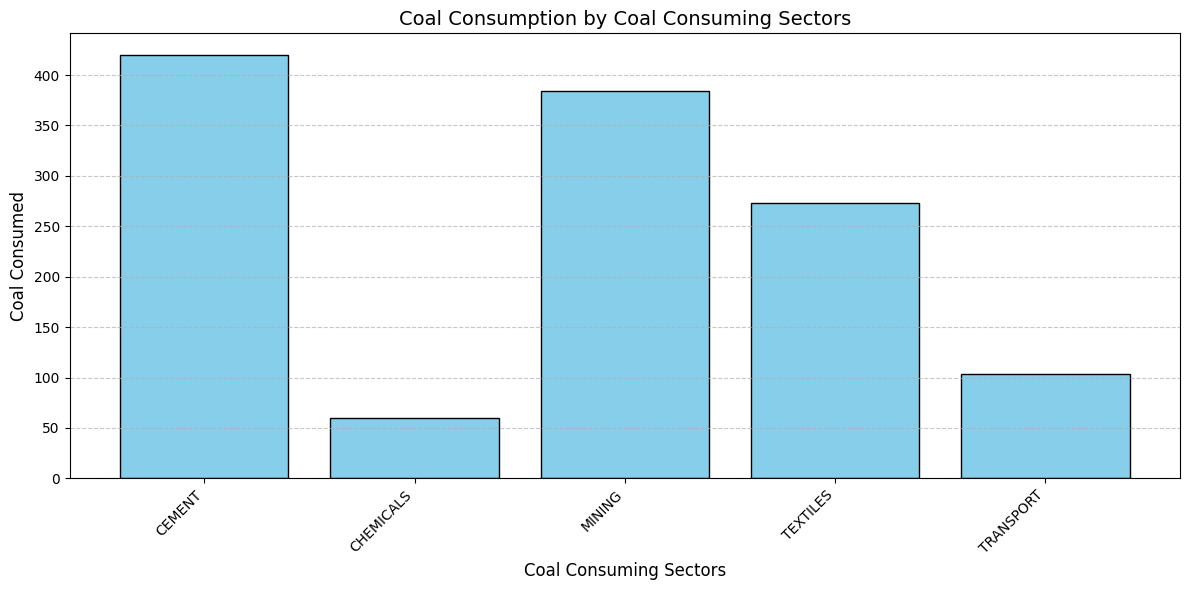

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = 'Coal_Consumption_by_sectors_India.csv'  # Replace with your actual file path
data_cleaned = pd.read_csv(file_path)

# Aggregate coal consumption by 'Coal Consuming Sectors'
sector_consumption = data_cleaned.groupby('Coal Consuming Sectors', as_index=False)['Coal Consumed'].sum()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(sector_consumption['Coal Consuming Sectors'], sector_consumption['Coal Consumed'], color='skyblue', edgecolor='black')
plt.title('Coal Consumption by Coal Consuming Sectors', fontsize=14)
plt.xlabel('Coal Consuming Sectors', fontsize=12)
plt.ylabel('Coal Consumed', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div style="text-align: center; padding: 10px; border-bottom: 2px solid #333;">
    <h2>Now, let's calculate Total coal consumption value from 2011 to 2020 .</h2>
</div>



In [27]:
import pandas as pd

# Load the cleaned dataset
file_path = 'Coal_Consumption_by_sectors_India.csv'  # Replace with your actual file path
data_cleaned = pd.read_csv(file_path)

# Calculate the total value of coal consumed
total_coal_consumed = data_cleaned['Coal Consumed'].sum()

# Print the result
print(f"Total Coal Consumed: {total_coal_consumed:.2f} units")

Total Coal Consumed: 1241.35 units


<div style="text-align: center; padding: 10px; border-bottom: 2px solid #333;">
    <h2>Now, let's compare and calculate Total coal consumption value for all sectors as well as for cement from 1980 to 2060 using SARIMA Time series model.</h2>
</div>



In [28]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the historical dataset
file_path = 'Coal_Consumption_by_sectors_India.csv'  # Replace with your actual file path
data_cleaned = pd.read_csv(file_path)

# Prepare the dataset for modeling
data_cleaned['YearCode'] = pd.to_datetime(data_cleaned['YearCode'], format='%Y')

# Initialize total coal consumption for all sectors
total_coal_consumed = 0

# Initialize total coal consumption for the "CEMENT" sector
cement_coal_consumed = 0

# Get unique sectors
sectors = data_cleaned['Coal Consuming Sectors'].unique()

# Forecast for each sector
for sector in sectors:
    # Filter data for the current sector
    sector_data = data_cleaned[data_cleaned['Coal Consuming Sectors'] == sector].copy()
    sector_data = sector_data.sort_values('YearCode')
    sector_data.set_index('YearCode', inplace=True)

    # Fit a SARIMA model
    model = SARIMAX(
        sector_data['Coal Consumed'],
        order=(1, 1, 1),
        seasonal_order=(1, 1, 1, 12)
    )
    fitted_model = model.fit(disp=False)

    # Predict future values from 2021 to 2060
    future_years = pd.date_range(start='2021', end='2060', freq='Y')
    future_forecast = fitted_model.forecast(steps=len(future_years))

    # Add historical and forecasted totals for this sector
    sector_total = sector_data['Coal Consumed'].sum() + future_forecast.sum()
    total_coal_consumed += sector_total

    # If the sector is "CEMENT," save its total separately
    if sector == 'CEMENT':
        cement_coal_consumed = sector_total

# Print the total coal consumed for all sectors and the "CEMENT" sector
print(f"Total Coal Consumed (1980-2060) for all sectors: {total_coal_consumed:.2f} units")
print(f"Total Coal Consumed (1980-2060) for CEMENT sector: {cement_coal_consumed:.2f} units")

Total Coal Consumed (1980-2060) for all sectors: 3288.08 units
Total Coal Consumed (1980-2060) for CEMENT sector: 1886.30 units


<div style="text-align: center; padding: 10px; border-bottom: 2px solid #333;">
    <h2>
Coal Consumption Trend for CEMENT Sector (1980-2020)</h2>
</div>



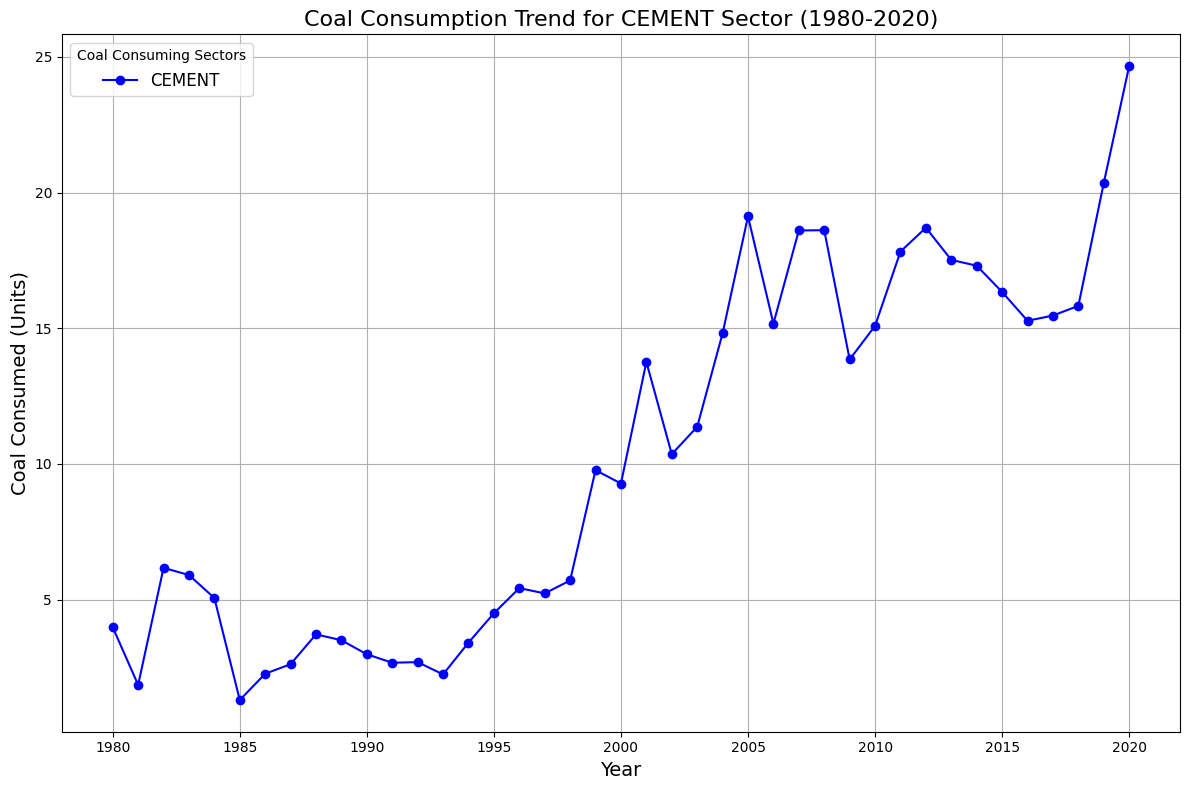

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the synthetic dataset
file_path = 'Coal_Consumption_by_sectors_India.csv'  # Update with the correct path
synthetic_df = pd.read_csv(file_path)

# Filter the dataset for the "CEMENT" sector only
cement_data = synthetic_df[synthetic_df["Coal Consuming Sectors"] == "CEMENT"]

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(cement_data["YearCode"], cement_data["Coal Consumed"], label="CEMENT", color='blue', marker='o')

# Customize the plot
plt.title("Coal Consumption Trend for CEMENT Sector (1980-2020)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Coal Consumed (Units)", fontsize=14)
plt.legend(title="Coal Consuming Sectors", fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

<div style="padding: 20px; border-radius: 10px; margin: 15px 0; background: linear-gradient(135deg, #1a1a1a, #2c3e50);">
    <h1 style="text-align: center; font-family: Arial, sans-serif; color: white; margin: 0; font-size: 28px;">
Let's build our model and see Total Coal Consumption Predictions for CEMENT Sector from 1980 to 2060 using SARIMA Model
 </h1>

</div>


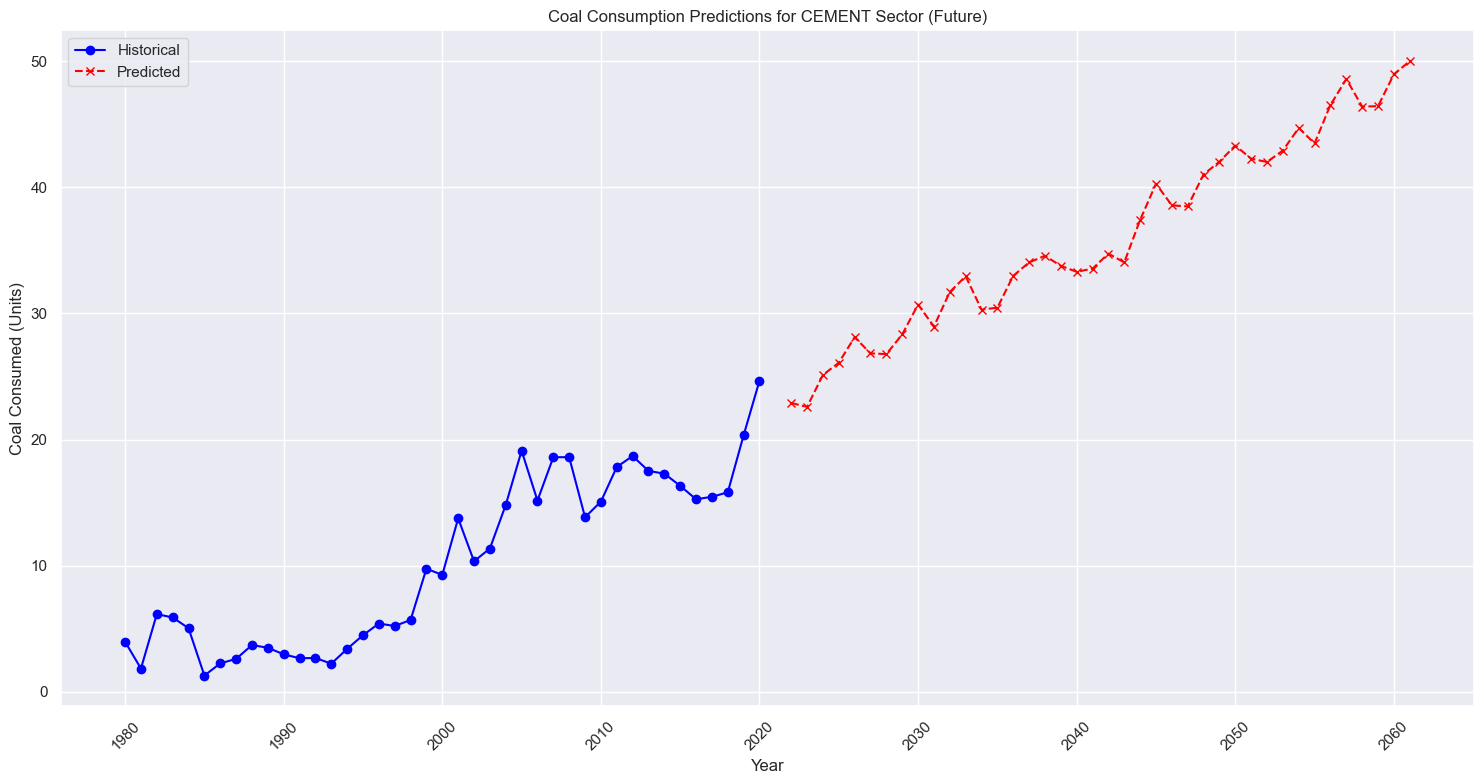

AIC: 133.90
BIC: 141.89


In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Configure plotting
sns.set_theme()
%matplotlib inline

def prepare_cement_data():
    # Load data
    data = pd.read_csv('Coal_Consumption_by_sectors_India.csv')
    
    # Convert year to datetime for time series analysis
    data['YearCode'] = pd.to_datetime(data['YearCode'], format='%Y')
    
    # Create additional features if needed
    data['Coal Growth Rate'] = data['Coal Consumed'].pct_change().fillna(0)
    return data

def build_cement_model(data):
    # Filter data for the "CEMENT" sector
    cement_data = data[data['Coal Consuming Sectors'] == 'CEMENT'].sort_values('YearCode')
    
    # Create exogenous variables
    exog_vars = ['Coal Growth Rate']
    exog = cement_data[exog_vars]
    
    # Fit SARIMA model with exogenous variables
    model = SARIMAX(
        cement_data['Coal Consumed'],
        exog=exog,
        order=(1, 1, 1),
        seasonal_order=(1, 1, 1, 12)
    )
    
    return model.fit(disp=False)

def predict_cement_future(model, last_data, steps=40):
    # Create future exogenous data (using last known values)
    future_exog = pd.DataFrame({
        'Coal Growth Rate': [last_data['Coal Growth Rate'].iloc[-1]] * steps
    })
    
    # Generate forecast
    forecast = model.forecast(steps=steps, exog=future_exog)
    return forecast

def plot_cement_predictions(data, predictions):
    plt.figure(figsize=(15, 8))
    
    # Plot historical data
    cement_data = data[data['Coal Consuming Sectors'] == 'CEMENT']
    plt.plot(cement_data['YearCode'], cement_data['Coal Consumed'], 
             label='Historical', color='blue', marker='o')
    
    # Plot predictions
    future_dates = pd.date_range(
        start=cement_data['YearCode'].max() + pd.DateOffset(years=1),
        periods=len(predictions),
        freq='Y'
    )
    plt.plot(future_dates, predictions, 
             label='Predicted', color='red', linestyle='--', marker='x')
    
    plt.title('Coal Consumption Predictions for CEMENT Sector (Future)')
    plt.xlabel('Year')
    plt.ylabel('Coal Consumed (Units)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Execute analysis
cement_data = prepare_cement_data()
cement_model = build_cement_model(cement_data)
future_predictions = predict_cement_future(cement_model, cement_data)
plot_cement_predictions(cement_data, future_predictions)

# Print model performance metrics
print(f"AIC: {cement_model.aic:.2f}")
print(f"BIC: {cement_model.bic:.2f}")

In [31]:
import pandas as pd
import plotly.express as px

# Load data
file_path = 'Coal_Consumption_by_sectors_India.csv'  # Replace with your file path
data_cleaned = pd.read_csv(file_path)

# Prepare data for "CEMENT" sector
data_cleaned['Year'] = pd.to_datetime(data_cleaned['YearCode']).dt.year
cement_data = data_cleaned[data_cleaned['Coal Consuming Sectors'] == 'CEMENT']

# Add synthetic metrics for the bubble chart
cement_data['Growth Rate'] = cement_data['Coal Consumed'].pct_change().fillna(0) * 100
cement_data['Cumulative Consumption'] = cement_data['Coal Consumed'].cumsum()

# Simulate future data for projections (2021-2060)
future_years = range(2021, 2050)
future_emissions = cement_data['Coal Consumed'].iloc[-1] * (1 + 0.02) ** (pd.Series(future_years) - 2020)  # Example 2% annual growth
future_growth_rate = [2.0] * len(future_years)  # Constant growth rate for simplicity
future_cumulative = future_emissions.cumsum()

# Create a DataFrame for future data
future_data = pd.DataFrame({
    'Year': future_years,
    'Coal Consumed': future_emissions,
    'Growth Rate': future_growth_rate,
    'Cumulative Consumption': future_cumulative
})

# Combine historical and future data
cement_sim_data = pd.concat([cement_data[['Year', 'Coal Consumed', 'Growth Rate', 'Cumulative Consumption']], future_data])

# Create an animated bubble chart
fig = px.scatter(
    cement_sim_data,
    x='Coal Consumed',
    y='Growth Rate',
    size='Cumulative Consumption',
    color='Year',
    animation_frame='Year',
    hover_name='Year',
    log_x=True,
    range_x=[cement_sim_data['Coal Consumed'].min() + 1e-5, cement_sim_data['Coal Consumed'].max()],
    range_y=[cement_sim_data['Growth Rate'].min() + 1e-5, cement_sim_data['Growth Rate'].max()],
    title='CEMENT Sector: Coal Consumption Simulation (1980-2050)',
    labels={'Coal Consumed': 'Coal Consumed (Units)', 'Growth Rate': 'Growth Rate (%)'},
    size_max=100  # Adjust maximum bubble size
)

# Update layout for better appearance
fig.update_layout(
    width=1000,
    height=720,
    xaxis_title='Coal Consumed (log scale)',
    yaxis_title='Growth Rate (log scale)',
    template='plotly_white'
)

# Display the bubble chart
fig.show()

<img src="images/dua_lipa.gif" alt="Dua Lipa" width="300" height="200" style="border: 2px solid #ccc; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">



<div style="display: flex; justify-content: center; align-items: center; gap: 10px;">
    <img src="images/english_greek.gif" alt="Thank you" width="300" height="200" style="border: 2px solid #ccc; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <img src="images/merci.gif" alt="Thank you" width="300" height="200" style="border: 2px solid #ccc; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">

</div>


<div style="display: flex; justify-content: center; align-items: center; gap: 10px;">
        <img src="images/xiexie.gif" alt="Thank You" width="300" height="200" style="border: 2px solid #ccc; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <img src="images/hindi.gif" alt="Thank you" width="300" height="200" style="border: 2px solid #ccc; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
</div>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f9f9f9;
            color: #333;
            line-height: 1.6;
            margin: 0;
            padding: 20px;
        }
        h1 {
            text-align: center;
            color: #2c3e50;
        }
        ul {
            list-style-type: none;
            padding: 0;
        }
        li {
            margin: 10px 0;
            padding: 10px;
            background-color: #ffffff;
            border: 1px solid #ddd;
            border-radius: 5px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
        }
        li a {
            text-decoration: none;
            color: #3498db;
            font-weight: bold;
        }
        li a:hover {
            text-decoration: underline;
        }
    </style>
</head>
<body>
    <h1>References</h1>
    <ul>
        <li>
            <strong>Land Use:</strong> 
            <a href="https://ourworldindata.org/grapher/annual-co2-including-land-use?tab=chart&time=1950..2020&country=CHN~IND~USA" target="_blank">
                Annual CO₂ Including Land Use
            </a>
        </li>
        <li>
            <strong>Annual CO₂:</strong> 
            <a href="https://ourworldindata.org/grapher/annual-co2-emissions-per-country?time=1950..2020&country=USA~IND~CHN" target="_blank">
                Annual CO₂ Emissions Per Country
            </a>
        </li>
        <li>
            <strong>By Other Sources (Coal, Gas, Oil, Cement, Flaring):</strong> 
            <a href="https://ourworldindata.org/grapher/co2-by-source?time=1950..2020&country=USA~IND~CHN" target="_blank">
                CO₂ by Source
            </a>
        </li>
        <li>
            <strong>Different Countries:</strong> 
            <a href="https://vizhub.healthdata.org/gbd-results/" target="_blank">
                Global Burden of Disease Results
            </a>
        </li>
    </ul>
</body>
</html>